# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself): Dylan Murphy, Liam Colburn, Michael Morgan

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation

https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [44]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import PredictionErrorDisplay, r2_score, mean_squared_error

In [3]:
# Enforce Copy-on-Write (CoW) semantics here
pd.options.mode.copy_on_write = True

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [4]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
cwd = Path().cwd()
project_folder = cwd.parent
dataset_path = Path('data/mystery-1.csv')
file = project_folder / dataset_path

if not file.exists():
    raise FileNotFoundError(f"Dataset not found: {file}")

df = pd.read_csv(file, delimiter='|')

# Simple Linear Regression

In [5]:
df

x           y          z          d1          d2         d3  \
0     45.257043  109.764179  38.057596  -59.072649  -14.805744  37.863842   
1     45.146703  109.814680  40.922755  -57.052267  -15.018721  37.872534   
2     47.732288  109.733472  39.181964  -42.744882   -9.708060  37.671144   
3     46.393936  109.376867  37.073853  -51.804489  -12.540430  37.774738   
4     52.908700  109.607200  37.583851  -12.337559    2.932994  37.291647   
...         ...         ...        ...         ...         ...        ...   
1849  69.127272   15.469881  44.189618  413.268380   59.889351  36.593340   
1850  79.062879   19.100656  40.525671  457.867006  107.774087  36.857181   
1851  67.099925   10.135119  37.653193  412.503332   51.331193  36.618824   
1852  76.684617   16.157545  36.884724  449.725234   95.413365  36.727196   
1853  77.070558   11.330552  40.954200  472.560728   97.380800  36.745135   

                d4     c  
0     94095.637152  11.0  
1     93969.141494   3.0  
2     93724.024307  11.0  
3     93377.854892  10.0  
4     93101.403795   0.0  
...            ...   ...  
1849  -4790.832560  12.0  
1850  -4936.105016   4.0  
1851  -5086.125698   1.0  
1852  -5124.376623   1.0  
1853  -6575.228052   1.0  

[1854 rows x 8 columns]

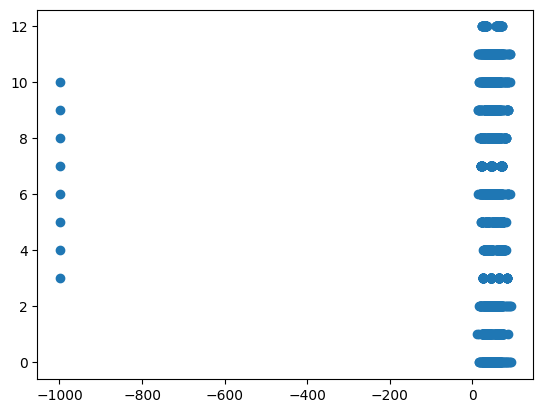

In [7]:
plt.scatter(df['x'], df['c'])
plt.show()

In [8]:
columnData = df

columnData = columnData[columnData['x'] != -999.0]
columnData = columnData[columnData['y'] != -999.0]
columnData['c'].value_counts()

# average of each variable does not change much when value of c is changed
for i in range(0, 7):
    print(f"column= {columnData.columns[i]}")
    for j in range(0, 13):
        print(f"c= {j}")
        cData = columnData[columnData['c'] == j]
        mean = cData[cData.columns[i]].mean()
        print(mean)

column= x
c= 0
49.223273239436615
c= 1
49.22609978429577
c= 2
49.221441783169006
c= 3
49.22992723091549
c= 4
49.22015033415493
c= 5
49.22734110478873
c= 6
49.228805279507036
c= 7
49.220303451690135
c= 8
49.22731970598591
c= 9
49.228730022394366
c= 10
49.22588178542253
c= 11
49.22784882366197
c= 12
49.226916301197186
column= y
c= 0
57.95225281690141
c= 1
57.95472062494366
c= 2
57.95025191366197
c= 3
57.95698798840845
c= 4
57.959717279450714
c= 5
57.9595452253521
c= 6
57.9554502040141
c= 7
57.959829209014096
c= 8
57.95771726725353
c= 9
57.950823155302814
c= 10
57.951495652323935
c= 11
57.95589633112675
c= 12
57.951601987971834
column= z
c= 0
39.8091138917821
c= 1
40.073986958391274
c= 2
40.165694210623506
c= 3
39.72867649042196
c= 4
40.05082252823355
c= 5
39.90625122377368
c= 6
40.14809075935204
c= 7
39.68675682355415
c= 8
40.5031162357775
c= 9
40.57774413516156
c= 10
39.44981702946346
c= 11
39.68887830389663
c= 12
40.17732371980914
column= d1
c= 0
143.0334210748807
c= 1
143.307145517787

In [9]:
halfData = columnData[300:400]
halfData

x          y          z          d1          d2         d3  \
300  64.463801  91.935406  41.737523  122.386333   40.817839  36.684133   
301  48.806200  90.761000  42.228783   31.359203   -7.305800  37.589313   
302  34.715649  89.777097  40.032957  -53.443712  -29.654717  38.693715   
303  46.268825  90.256391  38.112477   13.480581  -12.796048  37.784499   
304  41.883100  89.991800  38.448104  -12.037106  -20.767526  38.131669   
..         ...        ...        ...         ...         ...        ...   
395  56.687633  87.189238  39.854420   89.205573   13.853419  37.047208   
396  60.078122  87.519188  45.059464  113.970767   24.866701  36.861755   
397  38.041256  85.466702  39.517160  -19.017965  -26.169995  38.436460   
398  86.599961  89.526603  40.285848  264.155163  150.683766  37.612078   
399  73.053659  87.879558  37.684102  184.520924   77.632878  36.613958   

               d4     c  
300  62566.559785   3.0  
301  62560.913620   0.0  
302  62479.595420   4.0  
303  62392.985688  10.0  
304  62367.594172   0.0  
..            ...   ...  
395  56776.040115   6.0  
396  56405.091601   8.0  
397  56160.169328   4.0  
398  55801.099624   1.0  
399  55799.887019   6.0  

[100 rows x 8 columns]

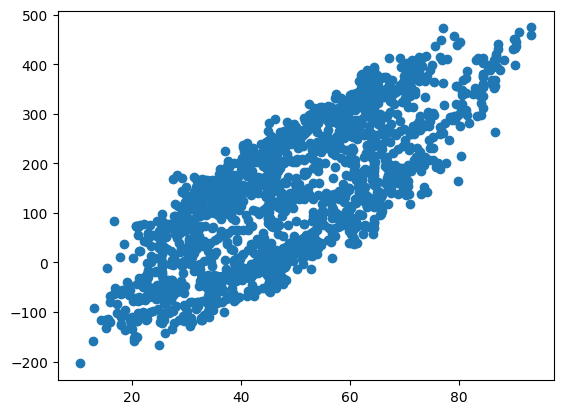

In [10]:
plt.scatter(columnData['x'], columnData['d1'])
plt.show()

In [11]:
# Linear regression with x and d1
X = np.array(columnData['x']).reshape(-1, 1)
D1 = np.array(columnData['d1']).reshape(-1, 1)
model = LinearRegression()
model.fit(X, D1)
prediction = model.predict(X)

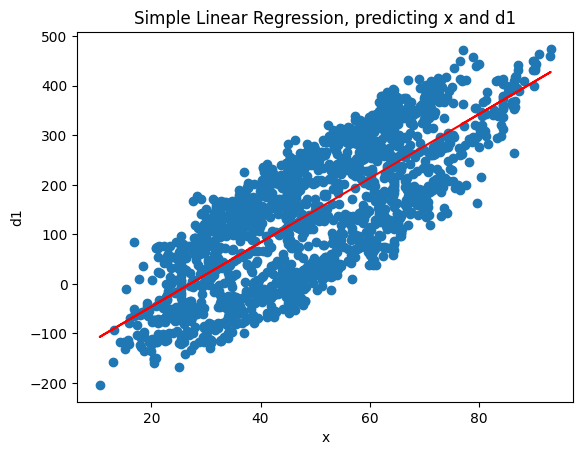

In [12]:
plt.scatter(columnData['x'], columnData['d1'])
line = prediction
plt.plot(columnData['x'], line, color='red')
plt.xlabel('x')
plt.ylabel('d1')
plt.title('Simple Linear Regression, predicting x and d1')
plt.show()

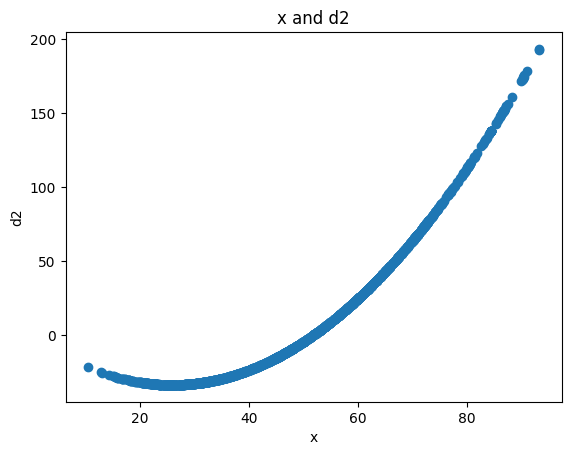

In [13]:
plt.scatter(columnData['x'], columnData['d2'])
plt.xlabel('x')
plt.ylabel('d2')
plt.title('x and d2')
plt.show()

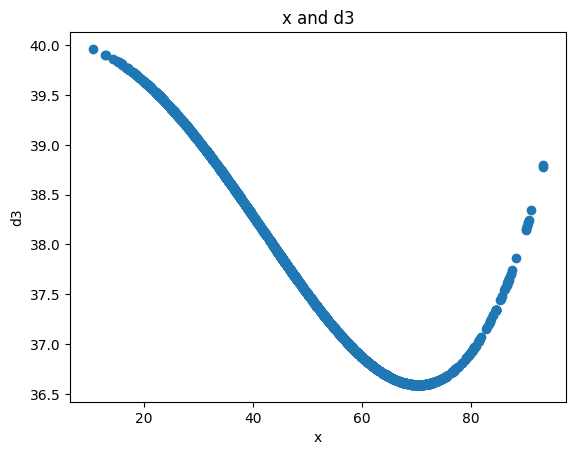

In [14]:
plt.scatter(columnData['x'], columnData['d3'])
plt.xlabel('x')
plt.ylabel('d3')
plt.title('x and d3')
plt.show()

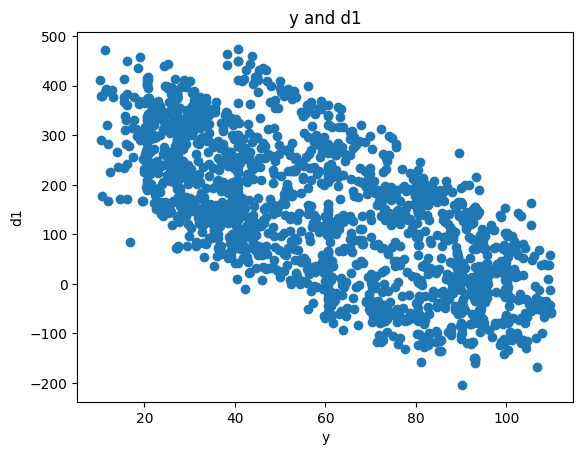

In [15]:
plt.scatter(columnData['y'], columnData['d1'])
plt.xlabel('y')
plt.ylabel('d1')
plt.title('y and d1')
plt.show()

In [16]:
# Linear Regression with y and d1
Y = np.array(columnData['y']).reshape(-1, 1)
D1 = np.array(columnData['d1']).reshape(-1, 1)
model = LinearRegression()
model.fit(Y, D1)
prediction = model.predict(Y)

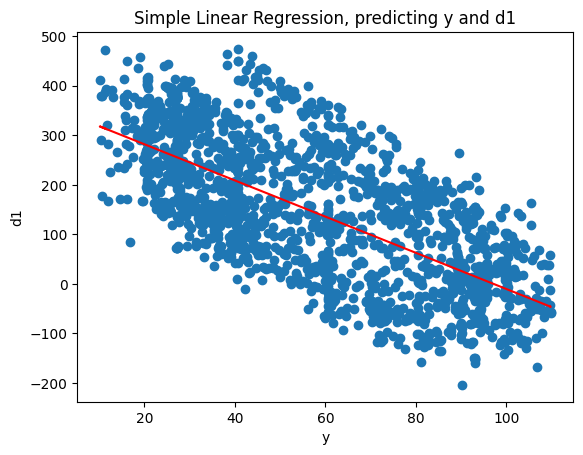

In [17]:
plt.scatter(columnData['y'], columnData['d1'])
line = prediction
plt.plot(columnData['y'], line, color='red')
plt.xlabel('y')
plt.ylabel('d1')
plt.title('Simple Linear Regression, predicting y and d1')
plt.show()

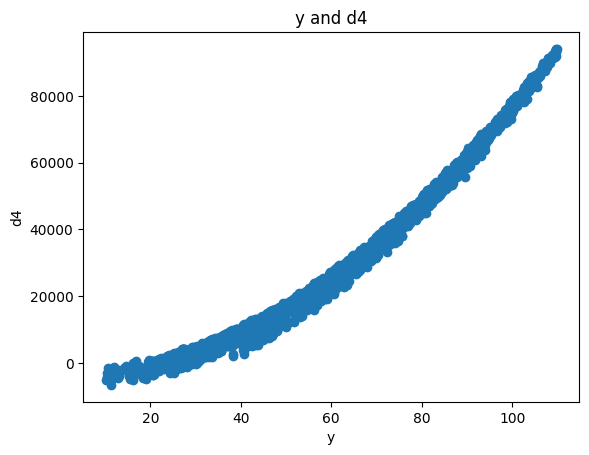

In [18]:
plt.scatter(columnData['y'], columnData['d4'])
plt.xlabel('y')
plt.ylabel('d4')
plt.title('y and d4')
plt.show()

# Polynomial + Decision Trees

In [19]:
mystery_df = df
mystery_df.head()

x           y          z         d1         d2         d3  \
0  45.257043  109.764179  38.057596 -59.072649 -14.805744  37.863842   
1  45.146703  109.814680  40.922755 -57.052267 -15.018721  37.872534   
2  47.732288  109.733472  39.181964 -42.744882  -9.708060  37.671144   
3  46.393936  109.376867  37.073853 -51.804489 -12.540430  37.774738   
4  52.908700  109.607200  37.583851 -12.337559   2.932994  37.291647   

             d4     c  
0  94095.637152  11.0  
1  93969.141494   3.0  
2  93724.024307  11.0  
3  93377.854892  10.0  
4  93101.403795   0.0

In [20]:
mystery_df.columns

Index(['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c'], dtype='object')

In [21]:
df2 = mystery_df[mystery_df['x'] > 0]

In [22]:
for col in df:
    print(df[col].describe(), end='\n\n******************\n\n')

count    1854.000000
mean       44.702607
std        70.720754
min      -999.000000
25%        35.862902
50%        47.474927
75%        62.189990
max        93.248123
Name: x, dtype: float64

******************

count    1854.000000
mean       53.394344
std        74.296663
min      -999.000000
25%        32.303485
50%        57.428922
75%        81.894692
max       109.814680
Name: y, dtype: float64

******************

count    1854.000000
mean       35.514137
std        68.185888
min      -999.000000
25%        37.941742
50%        39.920321
75%        42.012014
max        48.870364
Name: z, dtype: float64

******************

count    1854.000000
mean      138.298107
std       159.671681
min      -999.000000
25%        24.969669
50%       142.894013
75%       252.666808
max       474.250238
Name: d1, dtype: float64

******************

count    1854.000000
mean        3.278987
std        79.173899
min      -999.000000
25%       -28.312801
50%       -10.266625
75%        32.307670


In [23]:
df2

x           y          z          d1          d2         d3  \
0     45.257043  109.764179  38.057596  -59.072649  -14.805744  37.863842   
1     45.146703  109.814680  40.922755  -57.052267  -15.018721  37.872534   
2     47.732288  109.733472  39.181964  -42.744882   -9.708060  37.671144   
3     46.393936  109.376867  37.073853  -51.804489  -12.540430  37.774738   
4     52.908700  109.607200  37.583851  -12.337559    2.932994  37.291647   
...         ...         ...        ...         ...         ...        ...   
1849  69.127272   15.469881  44.189618  413.268380   59.889351  36.593340   
1850  79.062879   19.100656  40.525671  457.867006  107.774087  36.857181   
1851  67.099925   10.135119  37.653193  412.503332   51.331193  36.618824   
1852  76.684617   16.157545  36.884724  449.725234   95.413365  36.727196   
1853  77.070558   11.330552  40.954200  472.560728   97.380800  36.745135   

                d4     c  
0     94095.637152  11.0  
1     93969.141494   3.0  
2     93724.024307  11.0  
3     93377.854892  10.0  
4     93101.403795   0.0  
...            ...   ...  
1849  -4790.832560  12.0  
1850  -4936.105016   4.0  
1851  -5086.125698   1.0  
1852  -5124.376623   1.0  
1853  -6575.228052   1.0  

[1846 rows x 8 columns]

In [24]:
val_data = df2.drop_duplicates()
columns = val_data.columns

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        mean_v1 = val_data[columns[i]].mean()
        mean_v2 = val_data[columns[j]].mean()
        var_v1 = val_data[columns[i]].var()
        var_v2 = val_data[columns[j]].var()
        correlation_12 = val_data[columns[i]].corr(val_data[columns[j]])
                
        print(f"\n {columns[i]}, {columns[j]}:")
        print(f"  Mean of v1:      {mean_v1:.1f}")
        print(f"  Mean of v2:      {mean_v2:.1f}")
        print(f"  Variance of v1:  {var_v1:.1f}")
        print(f"  Variance of v2:  {var_v2:.1f}")
        print(f"  Correlation (v1, v2): {correlation_12:.2f}")
        print(f"  Sample size:    {len(val_data)}") 


 x, y:
  Mean of v1:      49.2
  Mean of v2:      58.0
  Variance of v1:  279.3
  Variance of v2:  720.8
  Correlation (v1, v2): -0.07
  Sample size:    1846

 x, z:
  Mean of v1:      49.2
  Mean of v2:      40.0
  Variance of v1:  279.3
  Variance of v2:  8.8
  Correlation (v1, v2): 0.01
  Sample size:    1846

 x, d1:
  Mean of v1:      49.2
  Mean of v2:      143.2
  Variance of v1:  279.3
  Variance of v2:  19972.8
  Correlation (v1, v2): 0.76
  Sample size:    1846

 x, d2:
  Mean of v1:      49.2
  Mean of v2:      7.6
  Variance of v1:  279.3
  Variance of v2:  1921.0
  Correlation (v1, v2): 0.93
  Sample size:    1846

 x, d3:
  Mean of v1:      49.2
  Mean of v2:      37.8
  Variance of v1:  279.3
  Variance of v2:  0.9
  Correlation (v1, v2): -0.91
  Sample size:    1846

 x, d4:
  Mean of v1:      49.2
  Mean of v2:      28732.6
  Variance of v1:  279.3
  Variance of v2:  715664205.1
  Correlation (v1, v2): -0.12
  Sample size:    1846

 x, c:
  Mean of v1:      49.2
  Mea

In [26]:
scale = np.arange(len(df))

# Will use this to calculate the loss with the related variables

loss = dict()

loss

{}

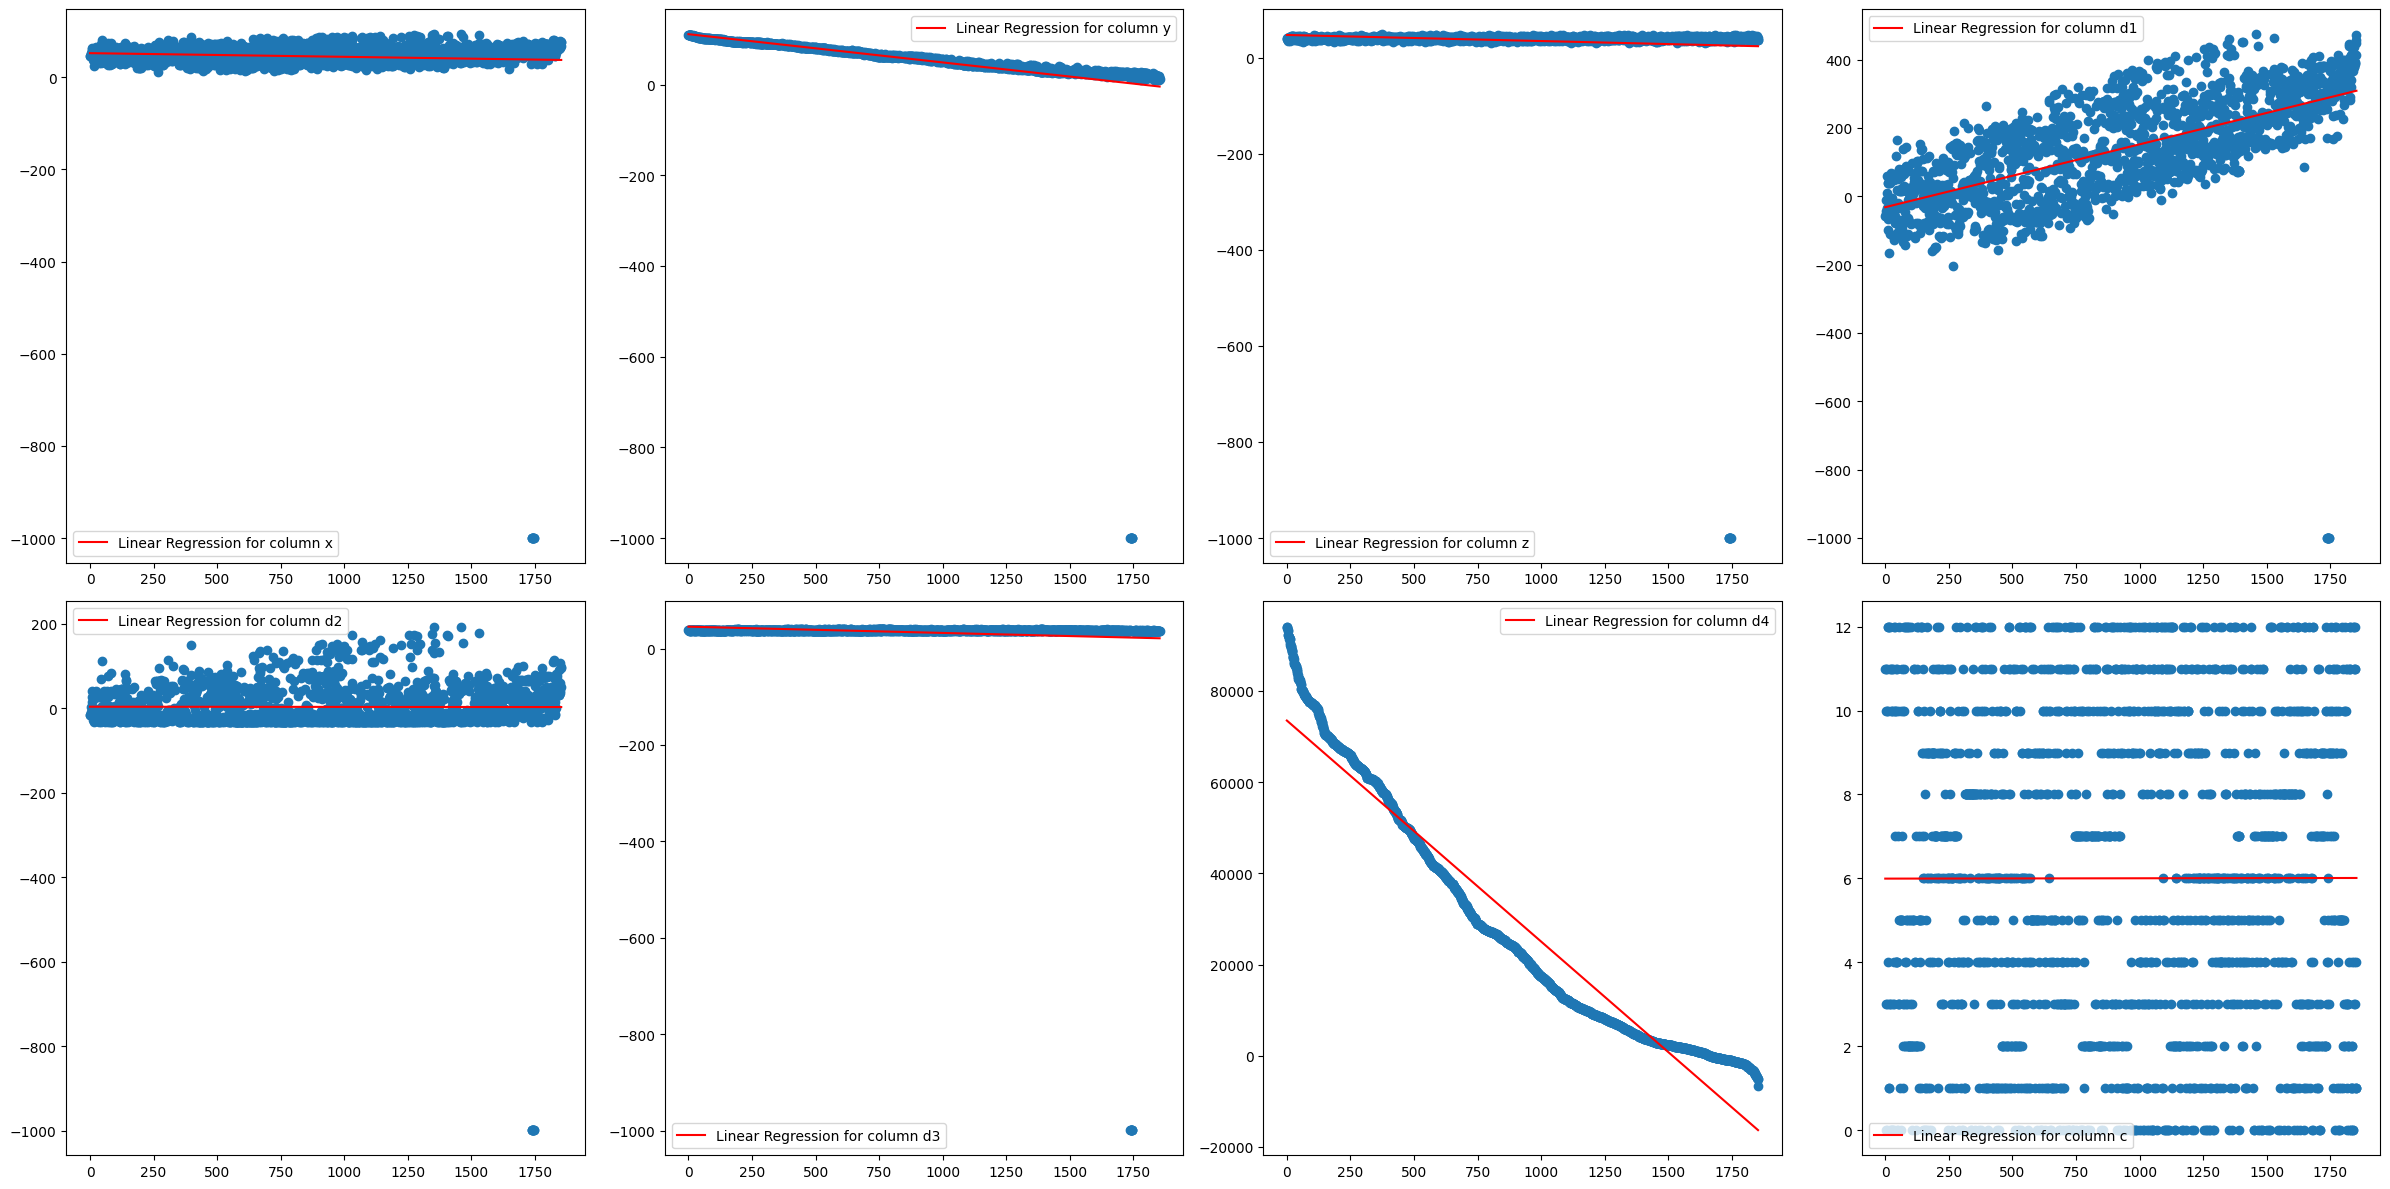




 POLYNOMIAL DEGREE OF 1




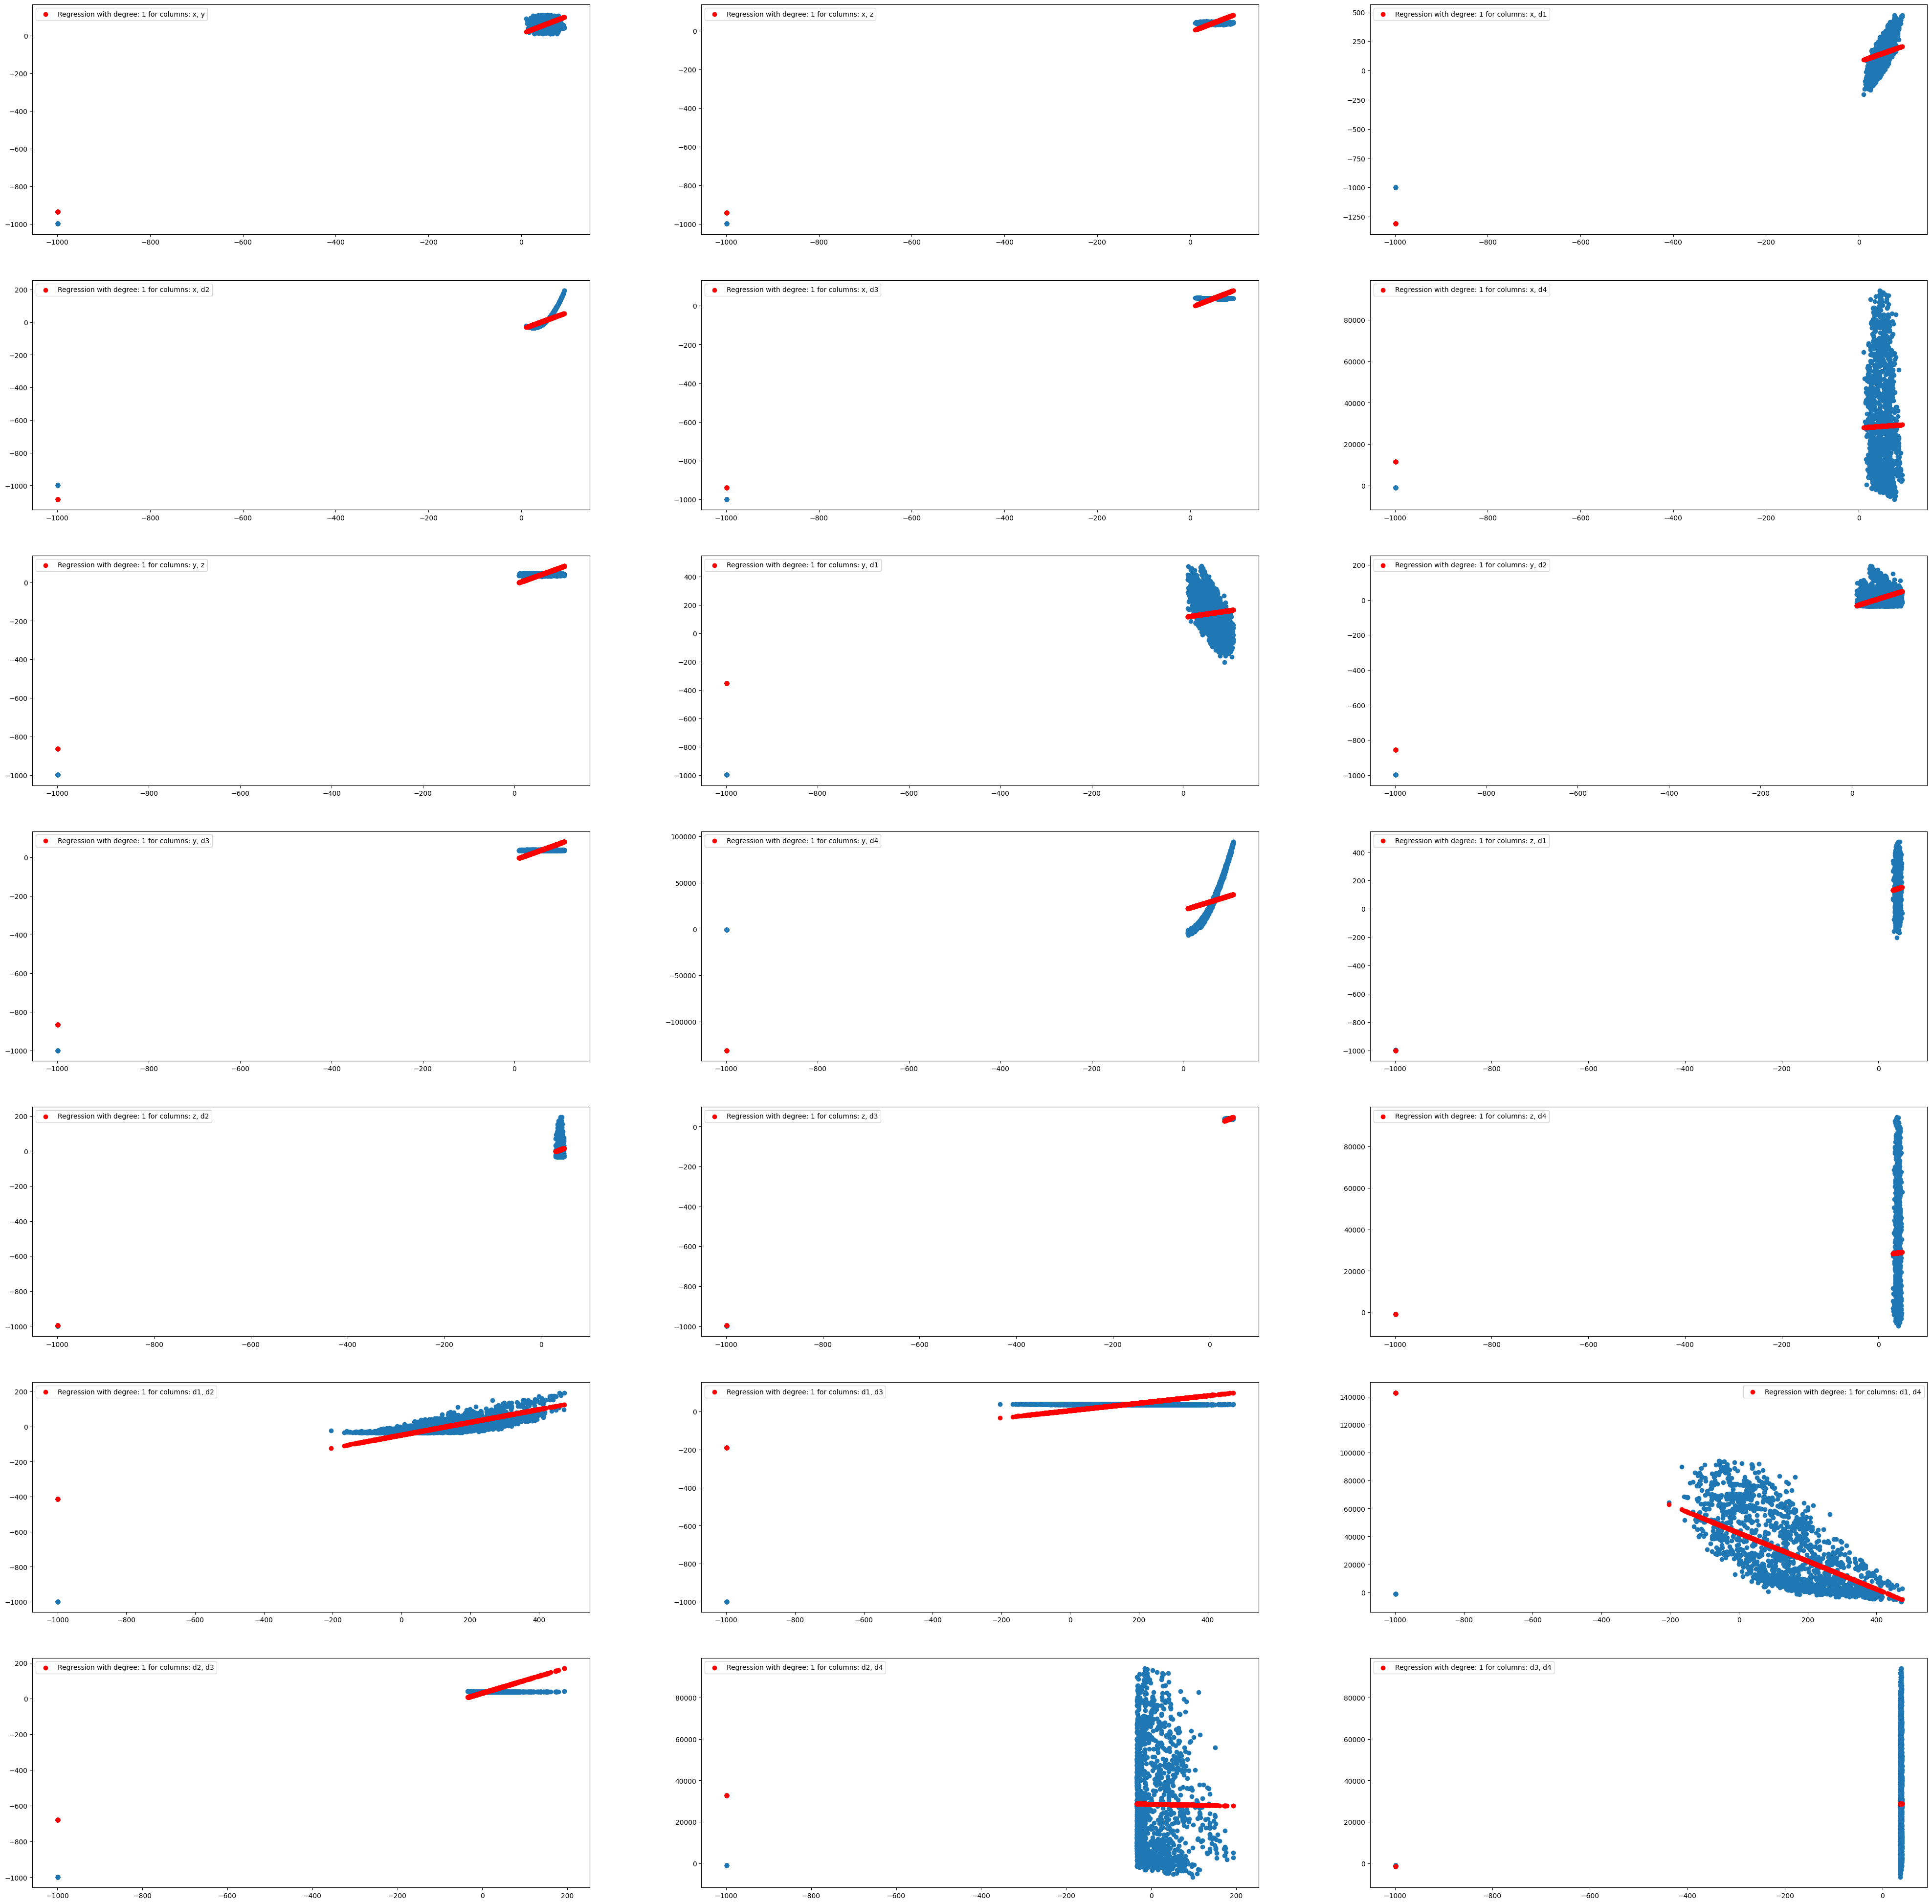




 POLYNOMIAL DEGREE OF 2




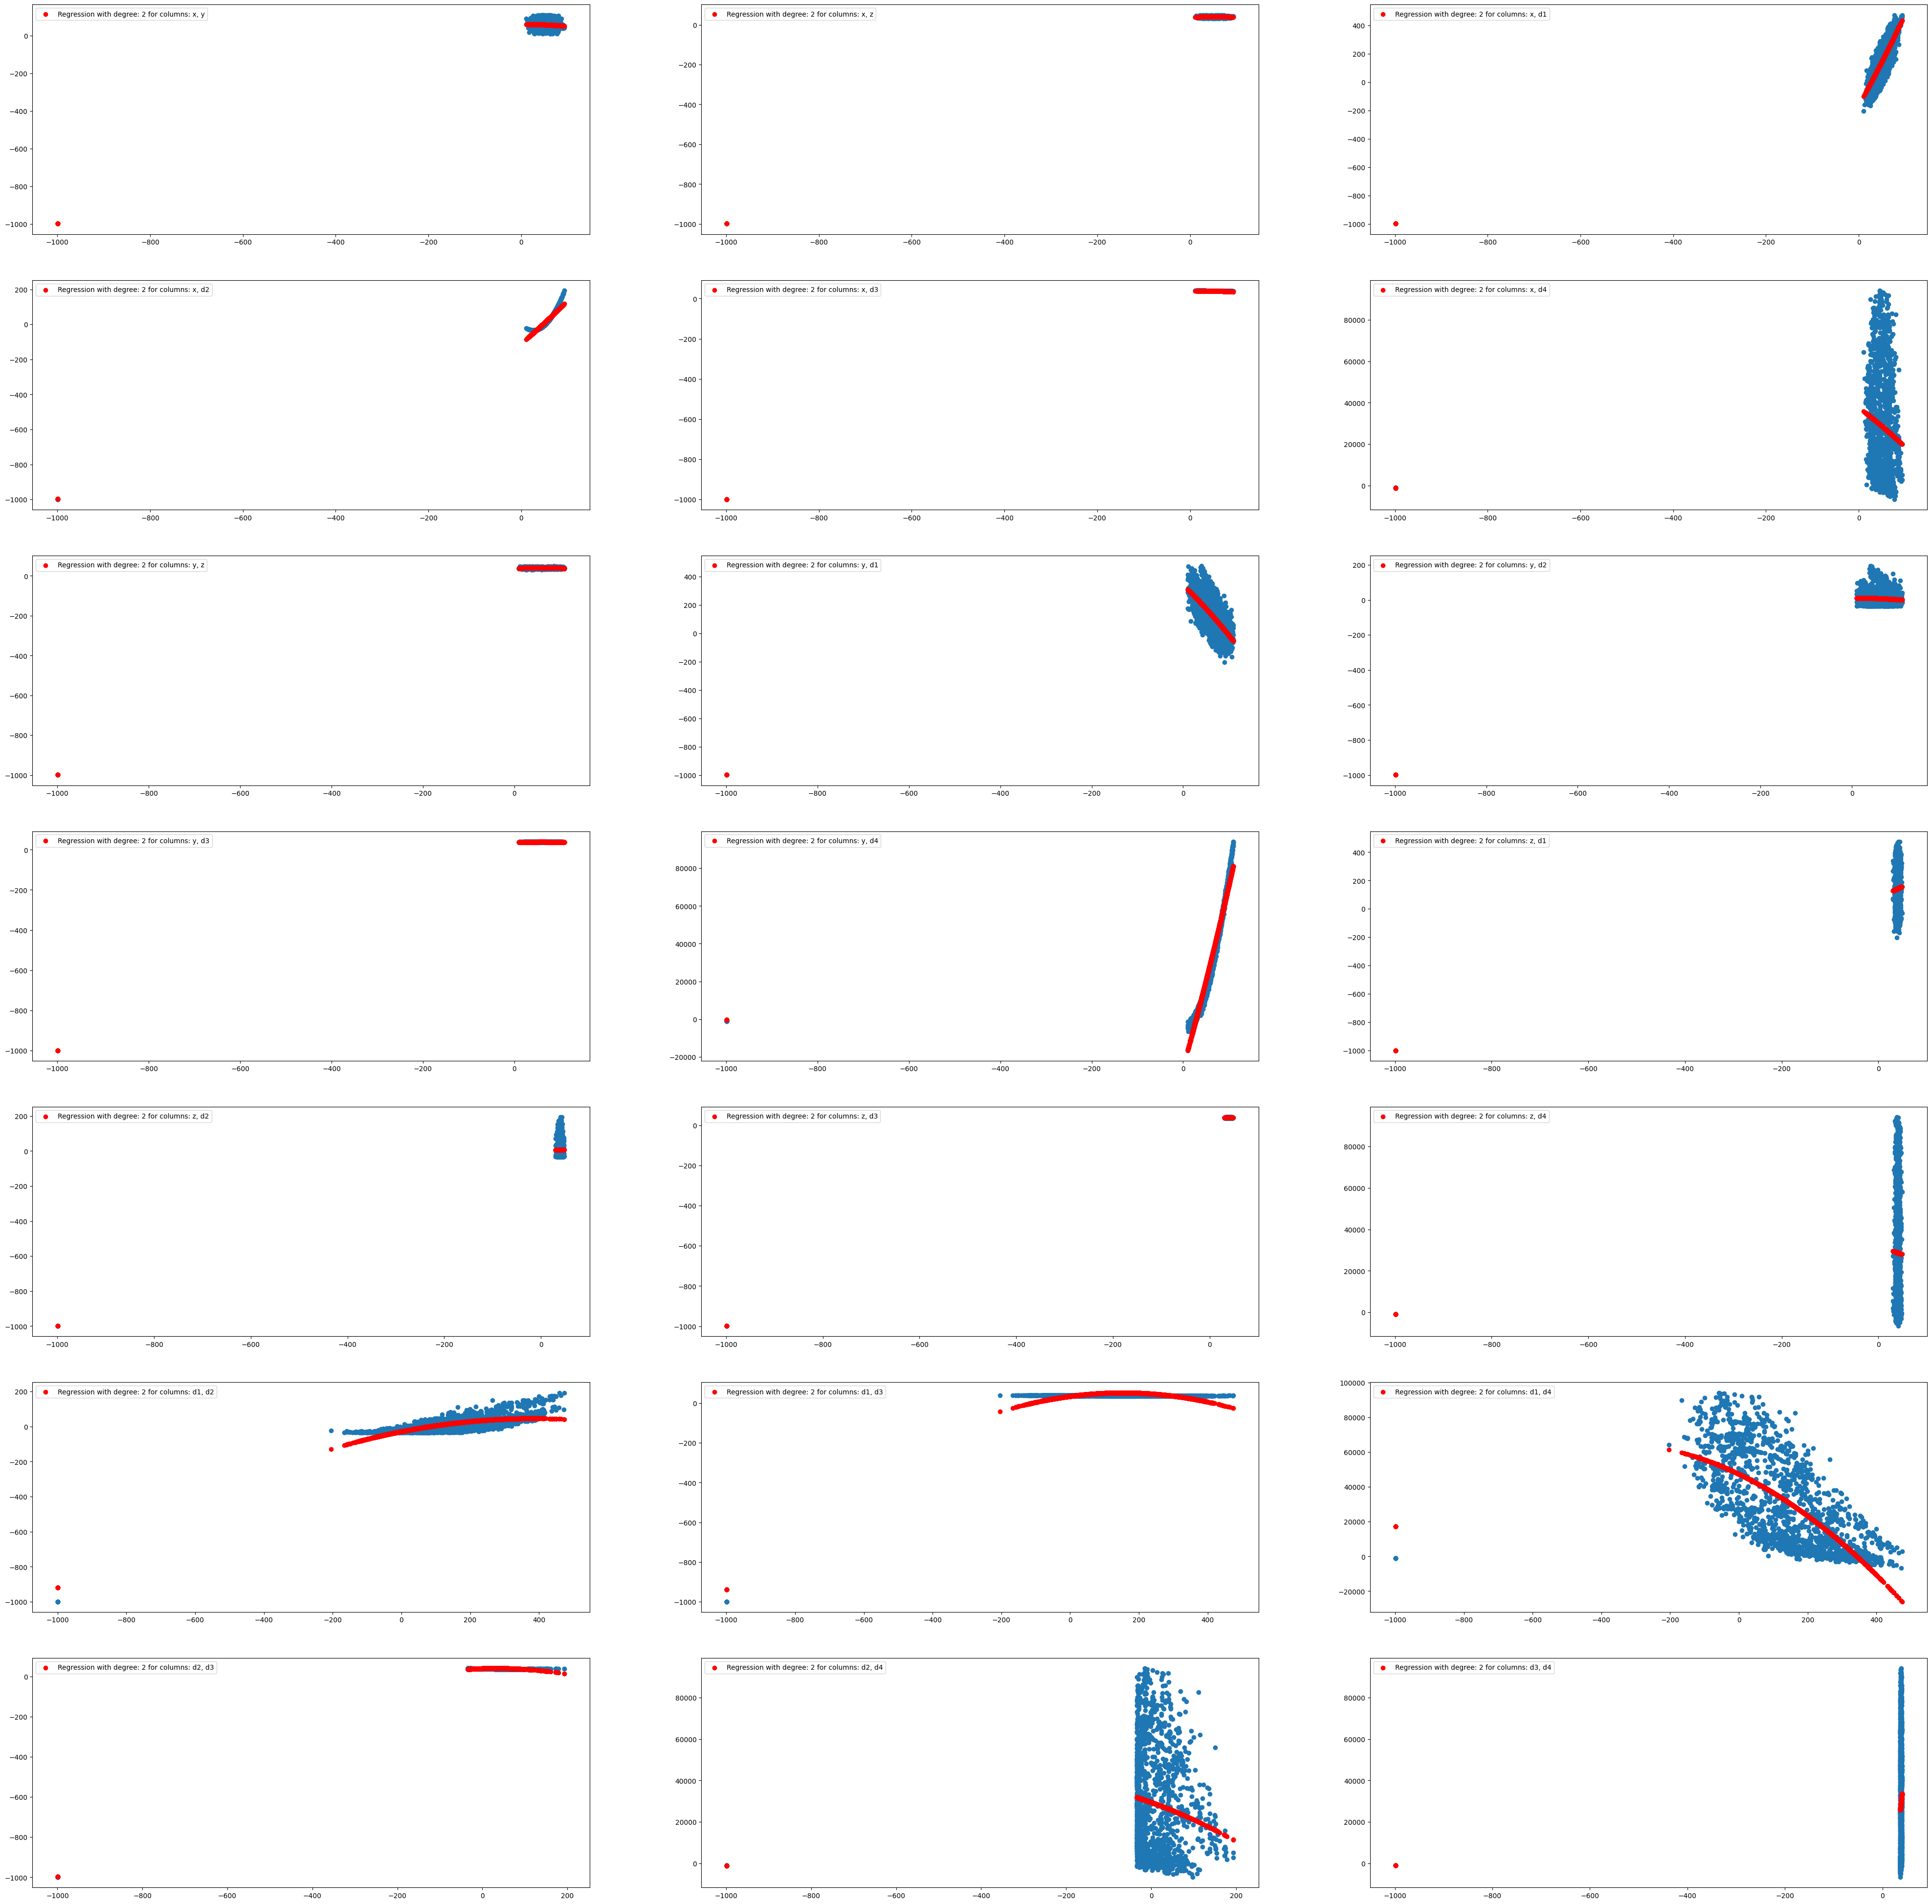




 POLYNOMIAL DEGREE OF 3




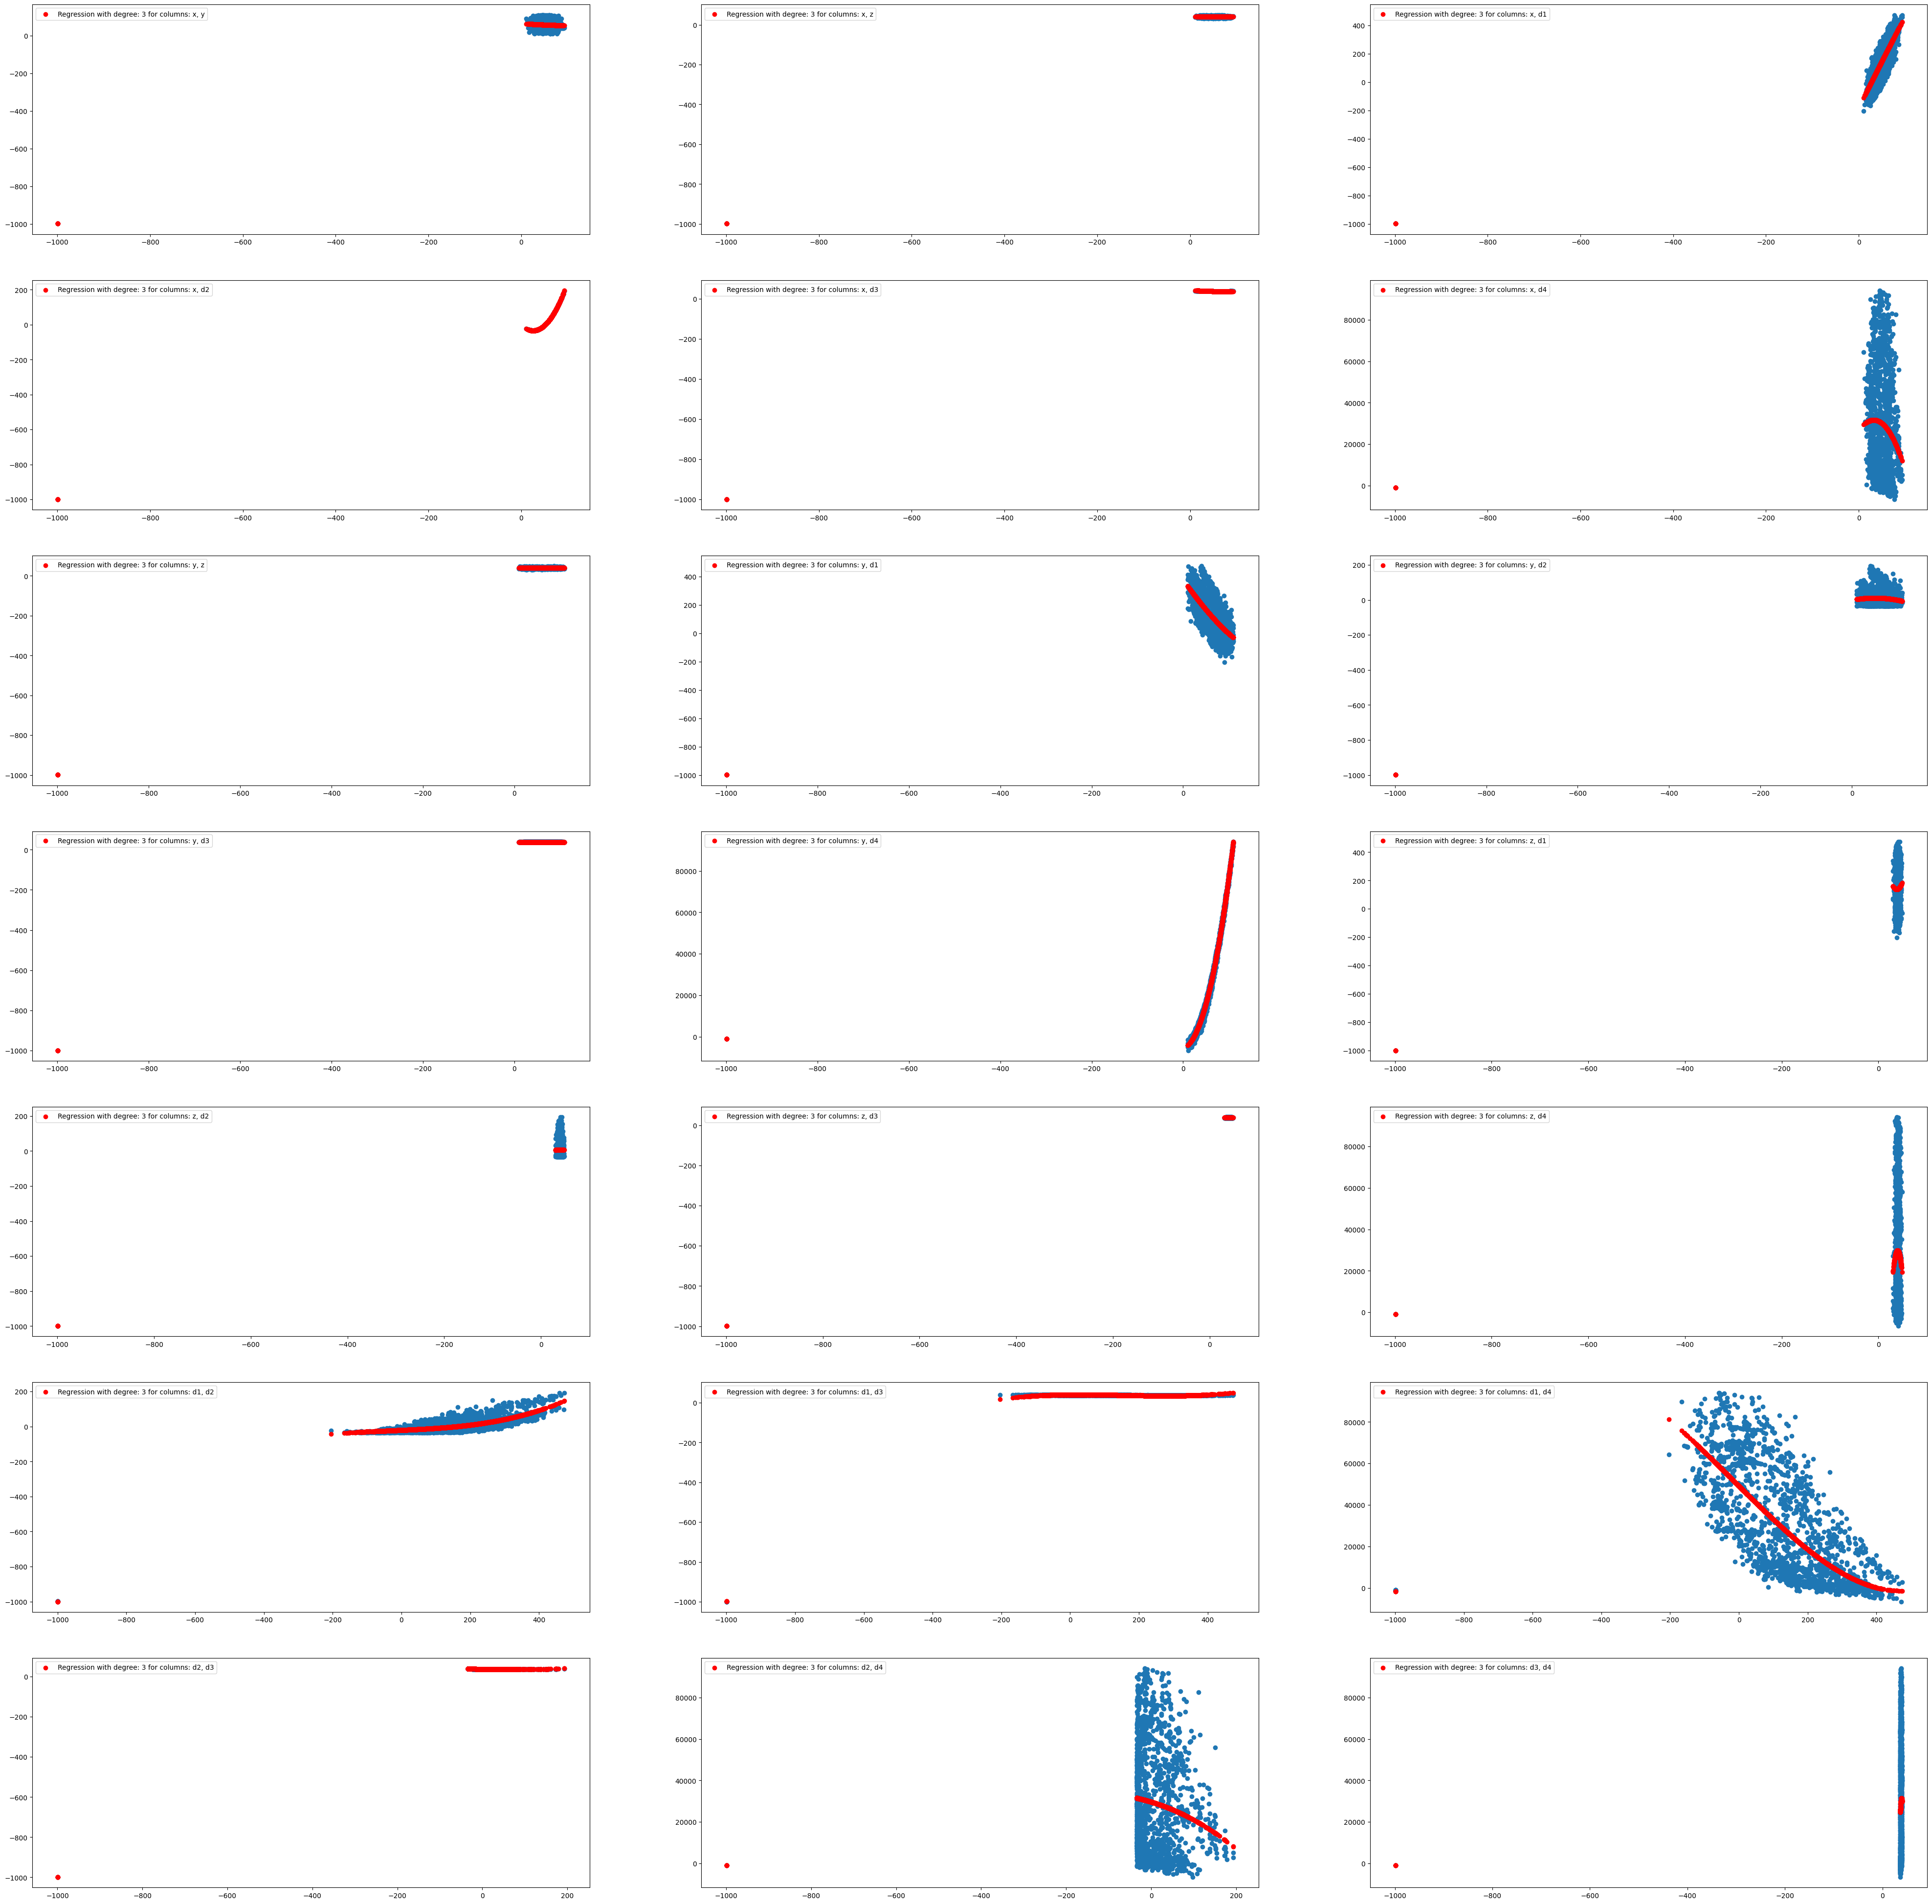




 POLYNOMIAL DEGREE OF 4




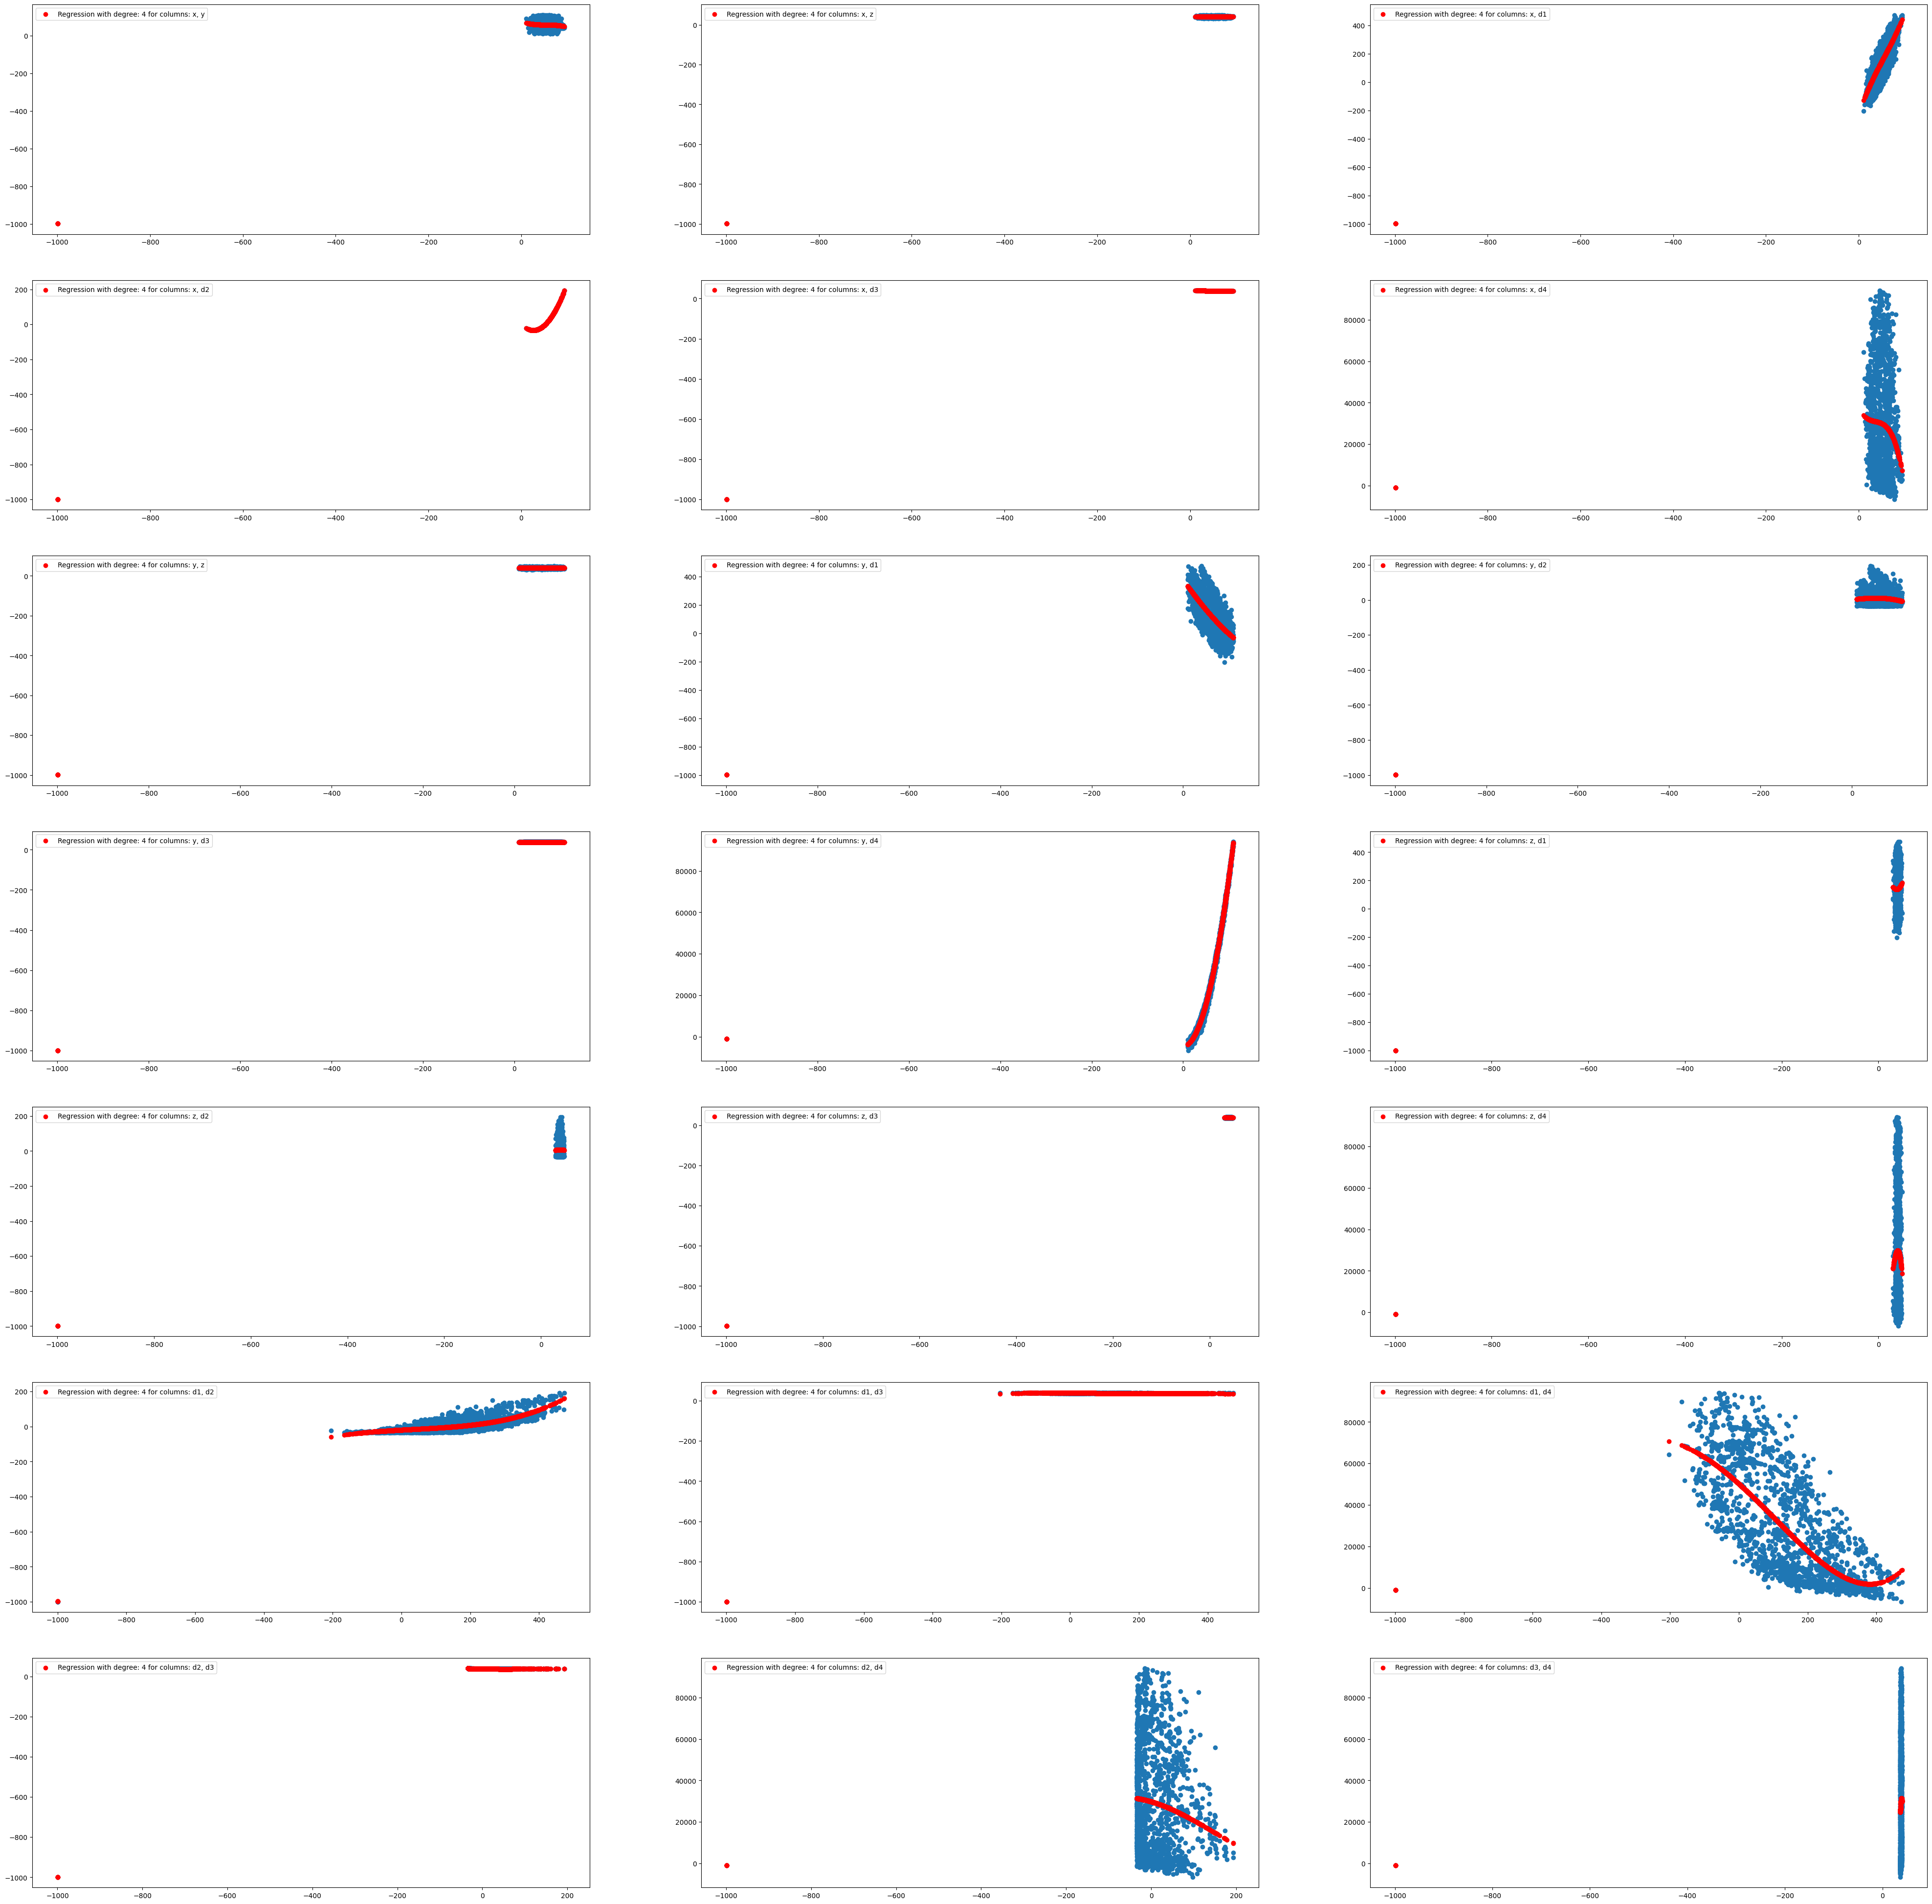




 POLYNOMIAL DEGREE OF 5




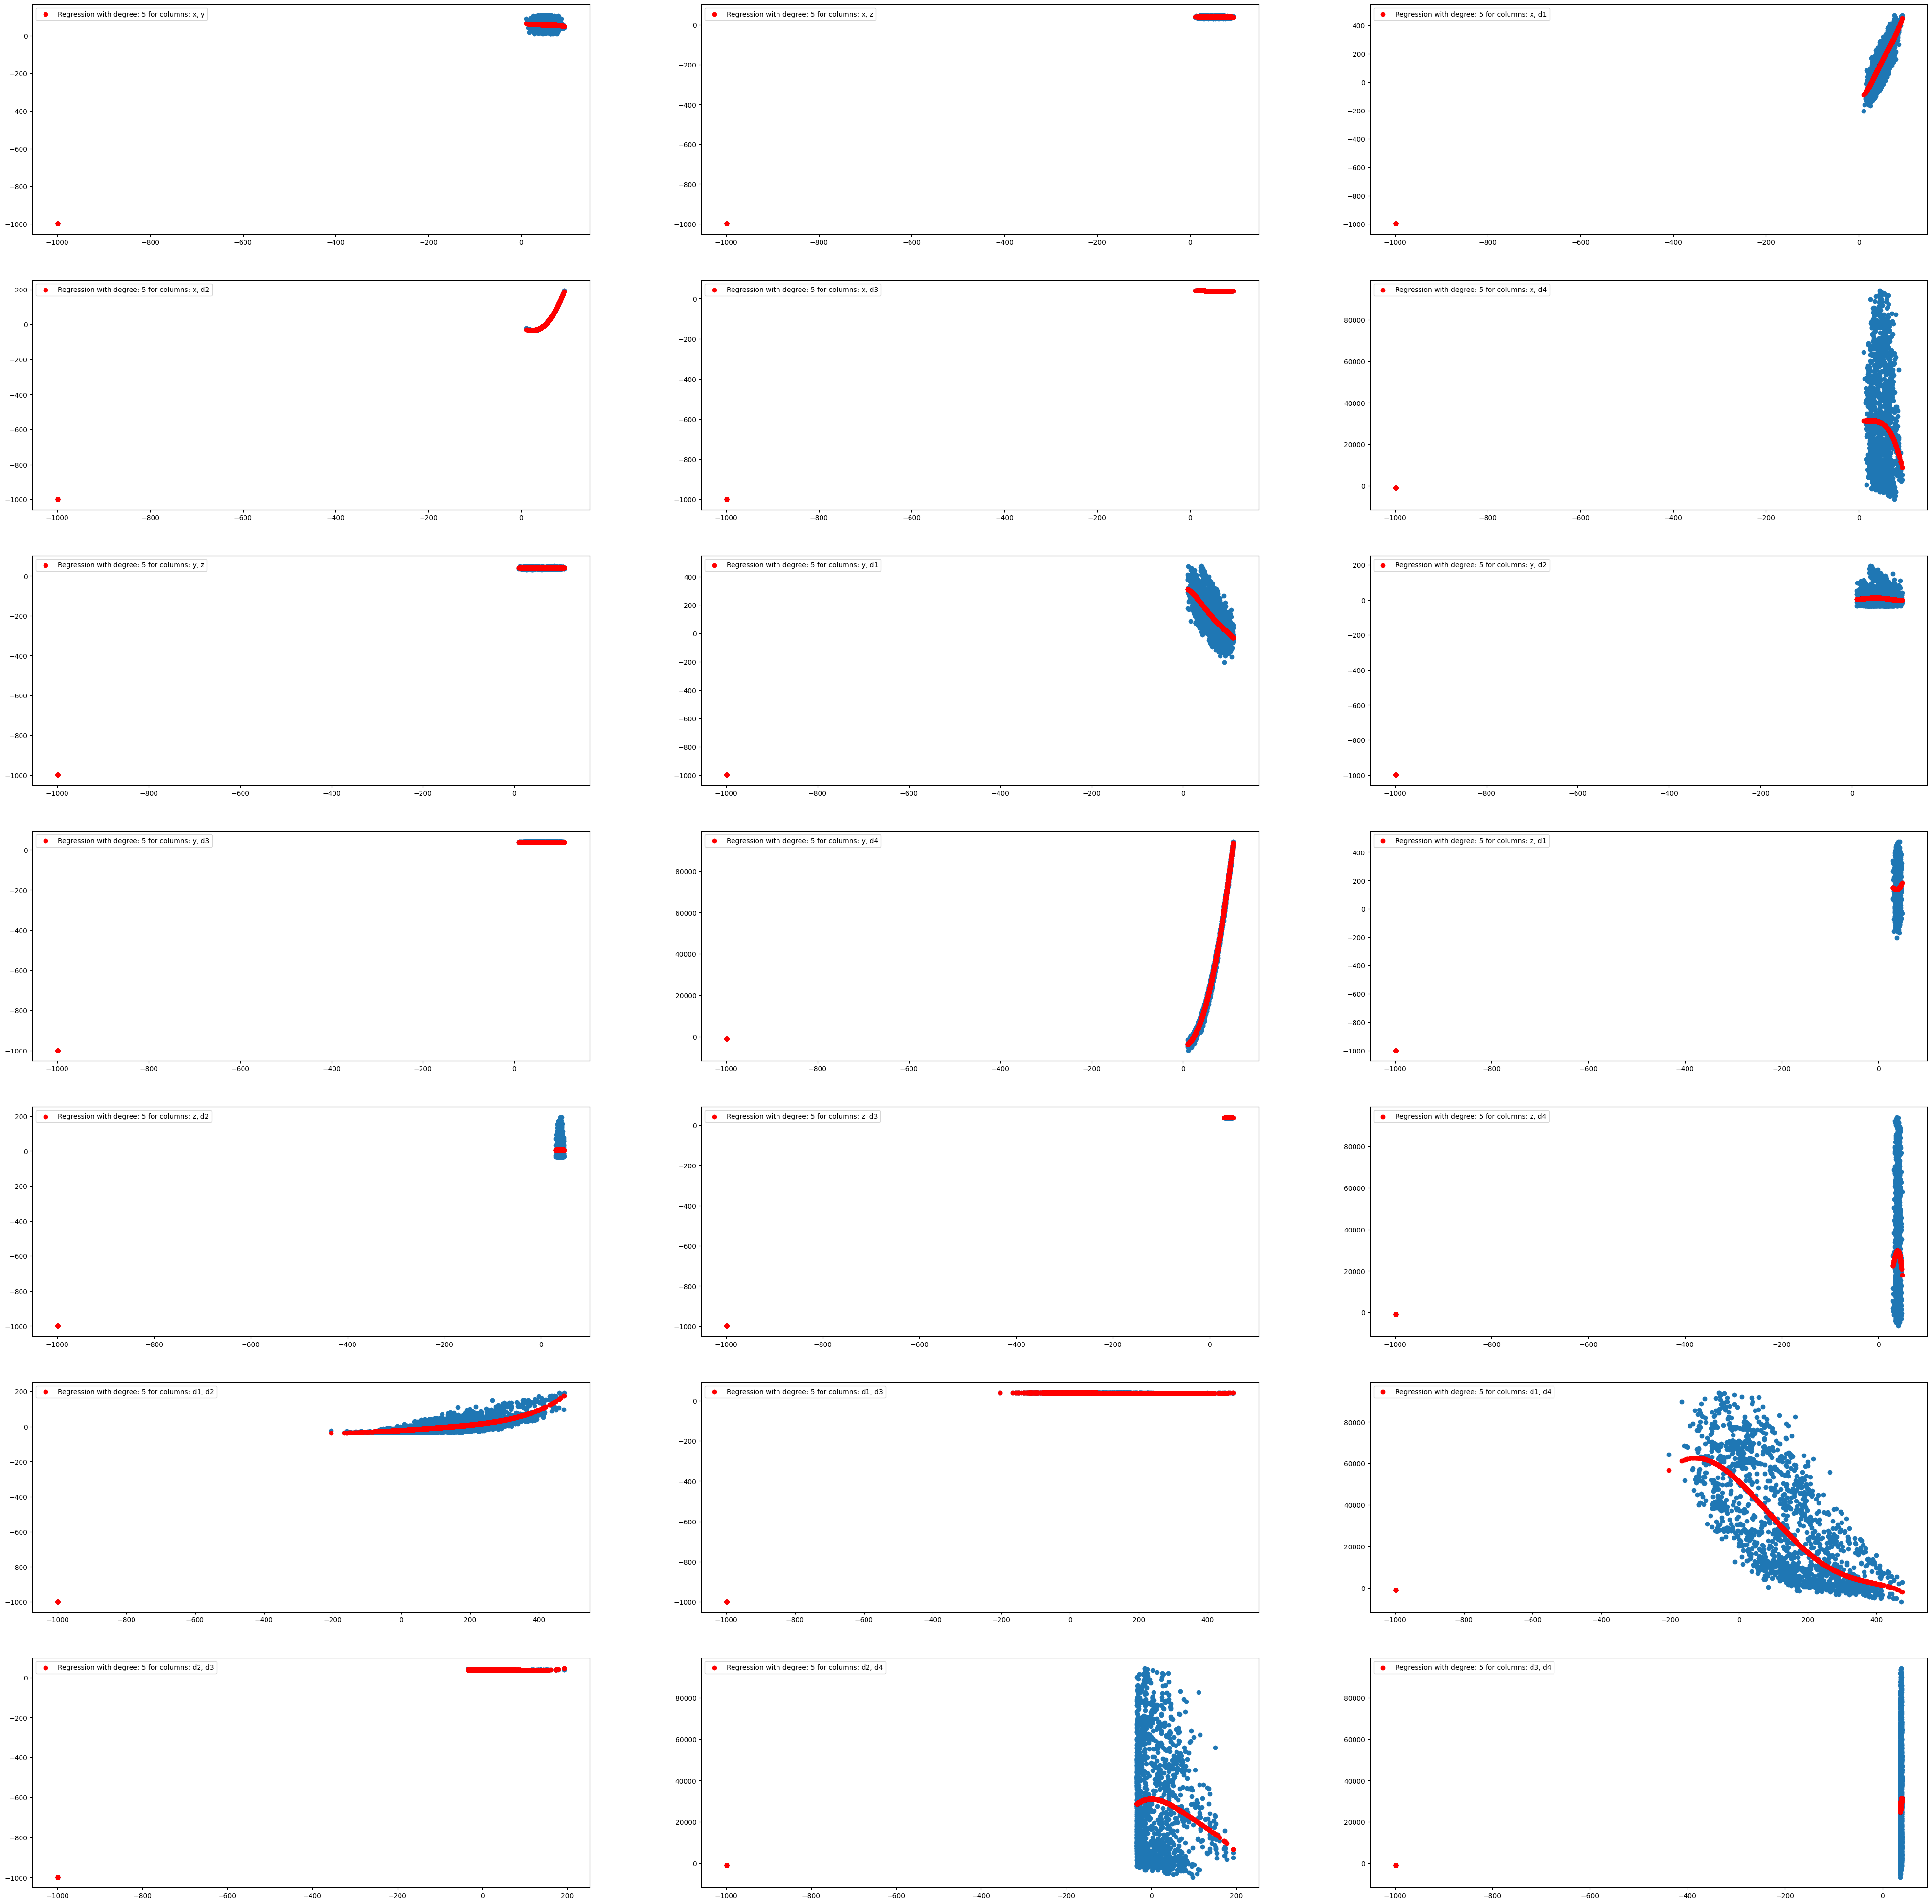

In [27]:
########################################################################################################
#                                  Every column  Individually                                          #
########################################################################################################

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

for i in range(len(columns)):

    x_scale = np.arange(len(df[columns[i]])).reshape(-1, 1)

    reg = LinearRegression().fit(x_scale, df[columns[i]].values)

    y_hat = reg.predict(x_scale)

    axes[i // 4, i % 4].plot(x_scale, y_hat, c='r', label=f'Linear Regression for column {columns[i]}')
    axes[i // 4, i % 4].scatter(x_scale, df[columns[i]])
    axes[i // 4, i % 4].legend()

    # loss[f'{columns[i]}'] = mean_squared_error(df[columns[i]], y_hat)
    
plt.tight_layout()
plt.show()


########################################################################################################
#                             Every Two column Combo POLYNOMIAL (1->5)                                 #
########################################################################################################


for d in range(1,6):

    print(f'\n\n\n POLYNOMIAL DEGREE OF {d}\n\n\n', end='')

    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(50, 50))
    count = 0
    for i in range(len(columns) - 1):
        for j in range(i+1, len(columns) - 1):
            poly = PolynomialFeatures(degree=d)
            x_poly = poly.fit_transform(df[columns[i]].values.reshape(-1, 1))

            reg = LinearRegression().fit(x_poly, df[columns[j]].values)

            y_hat = reg.predict(x_poly)

            
            axes[count // 3, count % 3].scatter(df[columns[i]], df[columns[j]])
            axes[count // 3, count % 3].scatter(df[columns[i]], y_hat, c='r', label=f'Regression with degree: {d} for columns: {columns[i]}, {columns[j]}')
            axes[count // 3, count % 3].legend()
            
            count += 1

            loss[f'{columns[i]}, {columns[j]}, {d}'] = mean_squared_error(df[columns[j]], y_hat)

    plt.show()

K-Fold Cross Validation

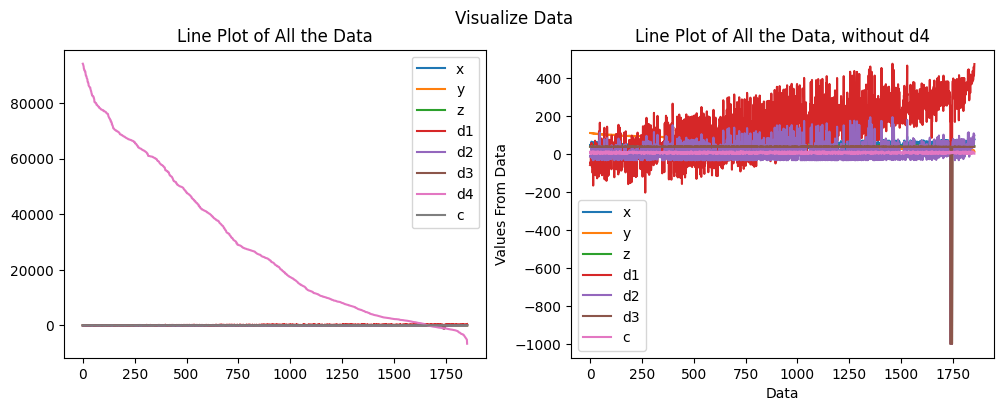

In [28]:
#Graph the information
# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Line Plot of All the Data')
ax[1].set_title('Line Plot of All the Data, without d4')

df_nod4 = df.drop(columns={'d4'}, inplace = False)

#Display our predictions
ax[0].plot(df)
ax[1].plot(df_nod4)
ax[0].legend(df)
ax[1].legend(df_nod4)
plt.xlabel('Data')
plt.ylabel('Values From Data')
plt.suptitle("Visualize Data")
plt.show()

c:\Users\mbuck\OneDrive\Documents\CS577\Assignment4\Assignment4\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Graph of log(data)')

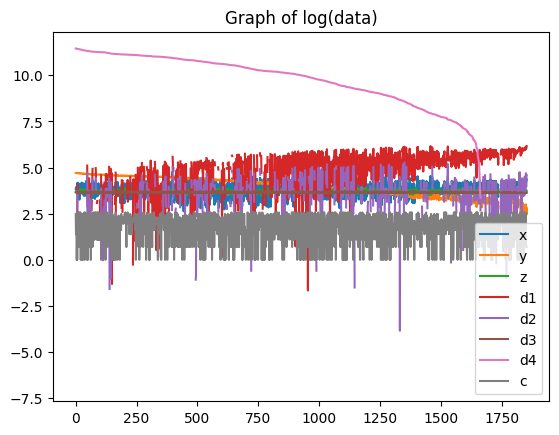

In [29]:
#Graph does not have any specific/useful infromation at a glance, other than that d4 follows a compltely different trend than the rest of the data

#Lets look at the log of the graph
log_df = np.log(df+1) #Adding 1 to avoid log(0)
plt.figure()
plt.plot(log_df)
plt.legend(log_df.columns)
plt.title("Graph of log(data)")

In [ ]:
#Our log graph doesn't really show us anything fruitful, other than that x,y,z,d1,d2,d3 al track together and have high correlation withone another. So maybe we should move on

#Let's remove the values at -999, this may help normalize our data
df = df[df['x'] != -999]

df.describe(include = 'all')


x            y            z           d1           d2  \
count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
mean     49.225695    57.955099    39.997406   143.226810     7.622558   
std      16.713001    26.847766     2.974248   141.325319    43.828991   
min      10.520750    10.135119    30.190542  -203.894934   -33.540389   
25%      36.033403    32.681073    37.977585    27.098028   -28.148776   
50%      47.551269    57.714450    39.945382   143.530673   -10.101627   
75%      62.237845    81.930778    42.018724   253.332106    32.481449   
max      93.248123   109.814680    48.870364   474.250238   193.247985   

                d3            d4            c  
count  1846.000000   1846.000000  1846.000000  
mean     37.786716  28732.589481     6.000000  
std       0.964186  26751.900963     3.742671  
min      36.589368  -6575.228052     0.000000  
25%      36.857343   4289.079588     3.000000  
50%      37.703620  22295.512173     6.000000  
75%      38.596542  50345.835908     9.000000  
max      39.963298  94095.637152    12.000000

Text(0.5, 0, 'Data [No Real Information, other than at what row the value comes from]')

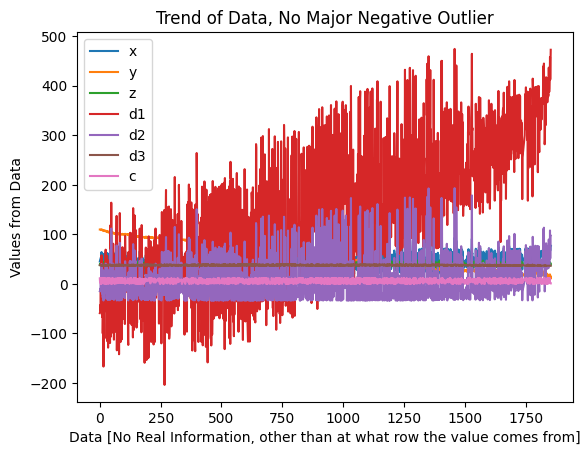

In [34]:
#Graph the information without the large minimum/outlier
df_nod4 = df.drop(columns={'d4'}, inplace = False)

#Display our predictions
plt.figure()
plt.plot(df_nod4)
plt.legend(df_nod4)
plt.title("Trend of Data, No Major Negative Outlier")
plt.ylabel("Values from Data")
plt.xlabel("Data [No Real Information, other than at what row the value comes from]")

#This graph shows us nothing and that we should instead use scatter plots, as there is too much noise for each column.

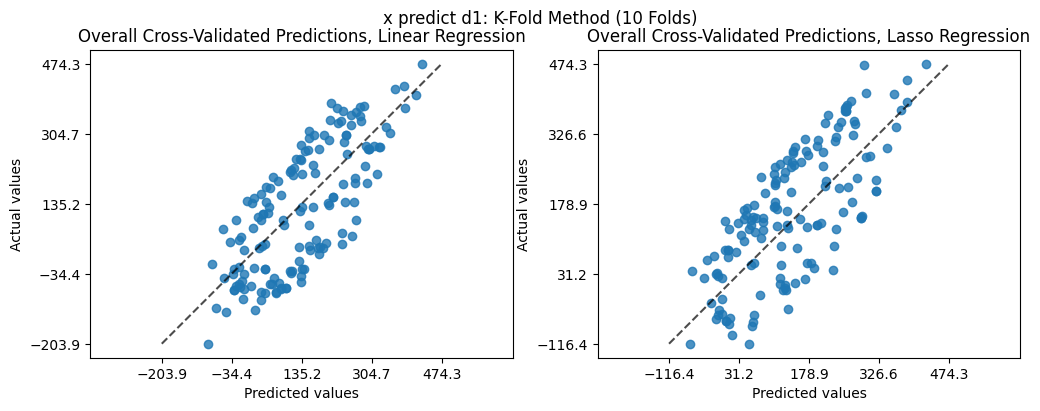

In [35]:
#trying k fold cross validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)

#Linear Regression Line for our Model (Maybe dont use it here lol, different regression line than linear maybe?)
model = linear_model.LinearRegression()
#I also saw the lasso being used in the documentation, upon further digging, Lasso Regression is a regression analysis used for variable selection and regularization,
# seems Lasso is commonly used to avoid overfitting
lasso = linear_model.Lasso(alpha=0.1)

#Test with x and d1
x = df['x']
d1 = df['d1']

x = x.values.reshape(-1,1)
d1 = d1.values.reshape(-1,1)


# Perform cross-validation prediction on the x vs d1 data, to see if there's any relation
# The 'kf' object is used internally by cross_val_predict to define the splits
predicted_all = cross_val_predict(model, x, d1, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, x, d1, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

#Display our predictions
PredictionErrorDisplay.from_predictions(d1, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d1, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("x predict d1: K-Fold Method (10 Folds)")
plt.show()

#Lasso Regression seems to work well. Both of the regression models seem to atleat show a correlation between our actual and predicted values,
#with our normal Linear Regression model seems to have more of the predictions closer to the line.

In [36]:
#This looks promising! Normalize our arrays from df now to use for future use.
y = df['y']
z = df['z']
d2 = df['d2']
d3 = df['d3']
d4 = df['d4']
c = df['c']

#Reshape so they can be used
y = y.values.reshape(-1,1)
z = z.values.reshape(-1,1)
d2 = d2.values.reshape(-1,1)
d3 = d3.values.reshape(-1,1)
d4 = d4.values.reshape(-1,1)
c = c.values.reshape(-1,1)

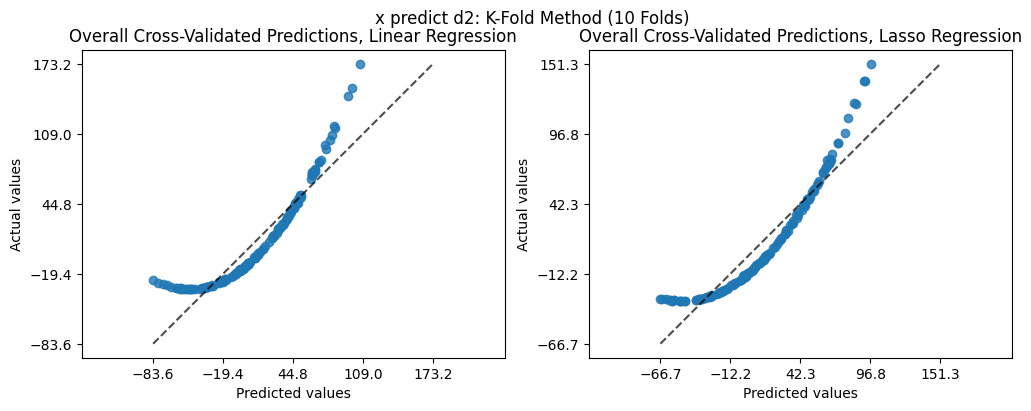

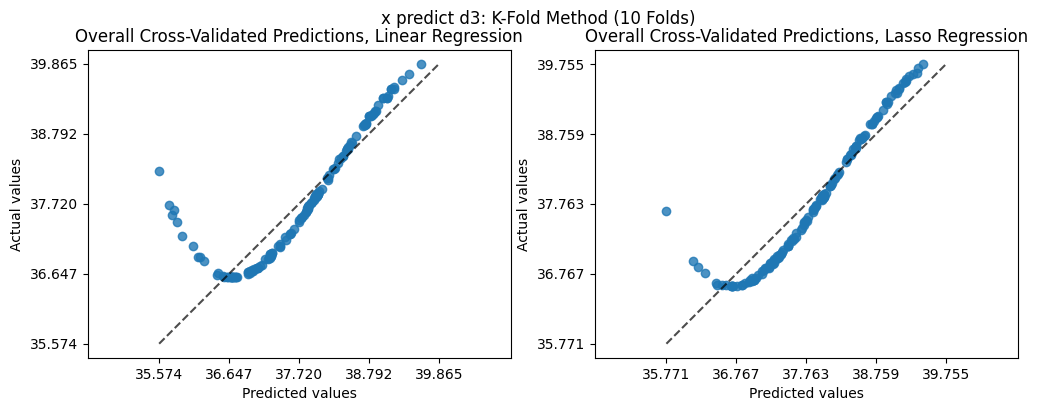

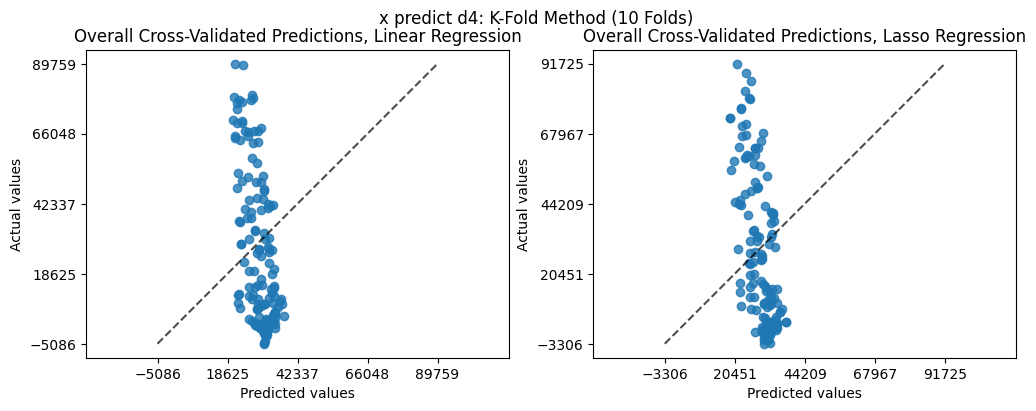

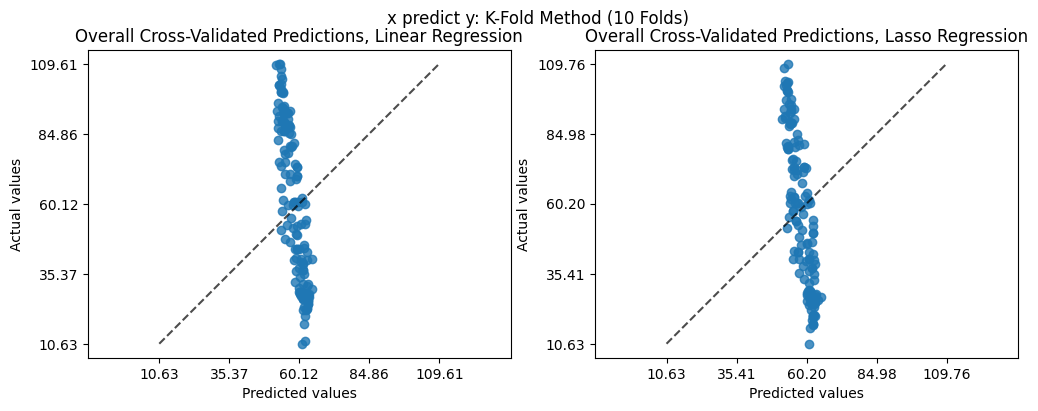

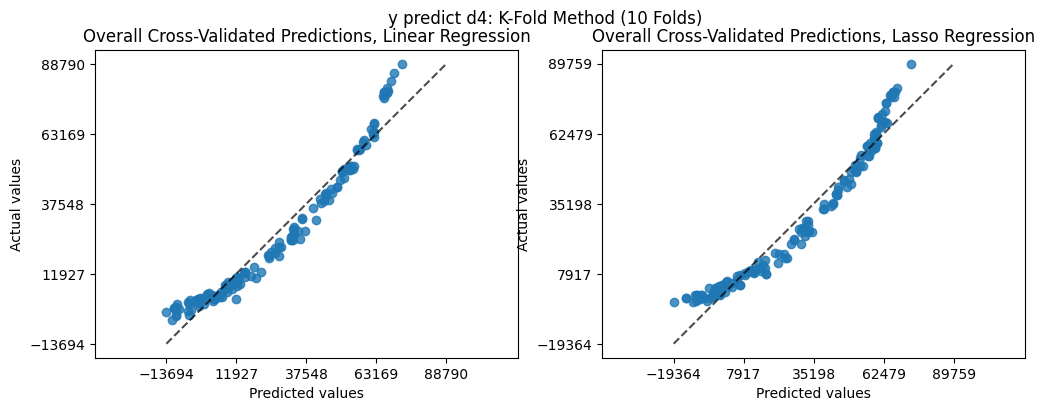

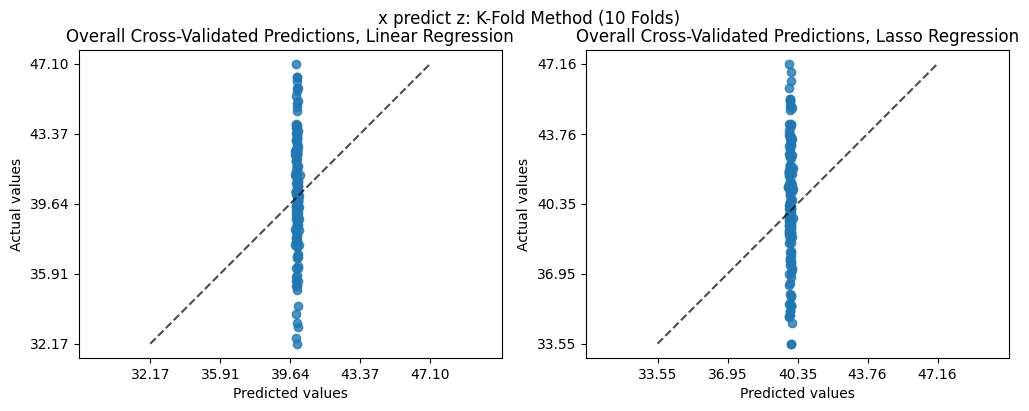

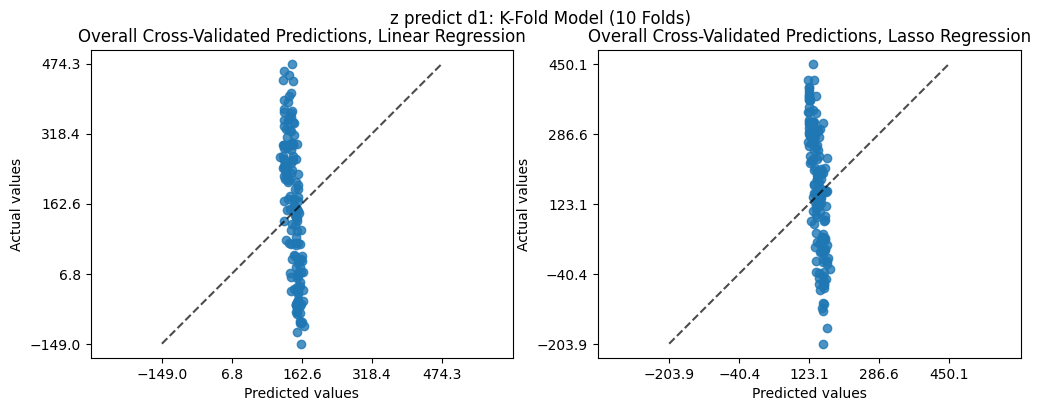

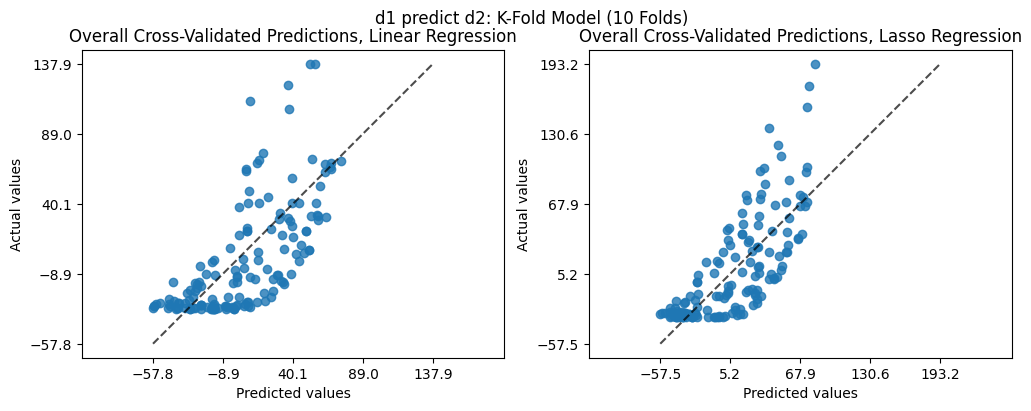

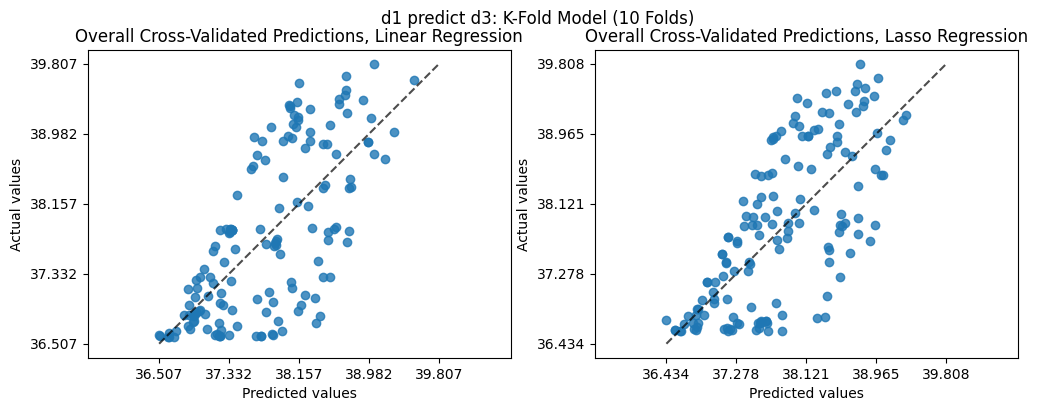

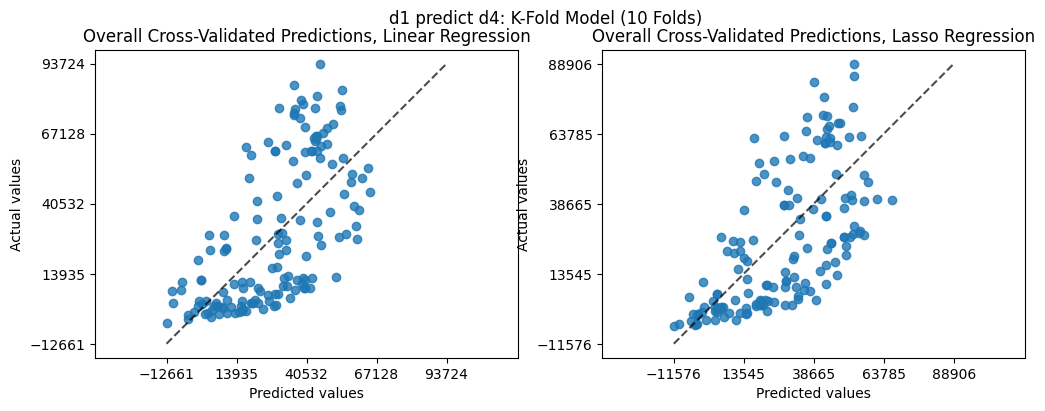

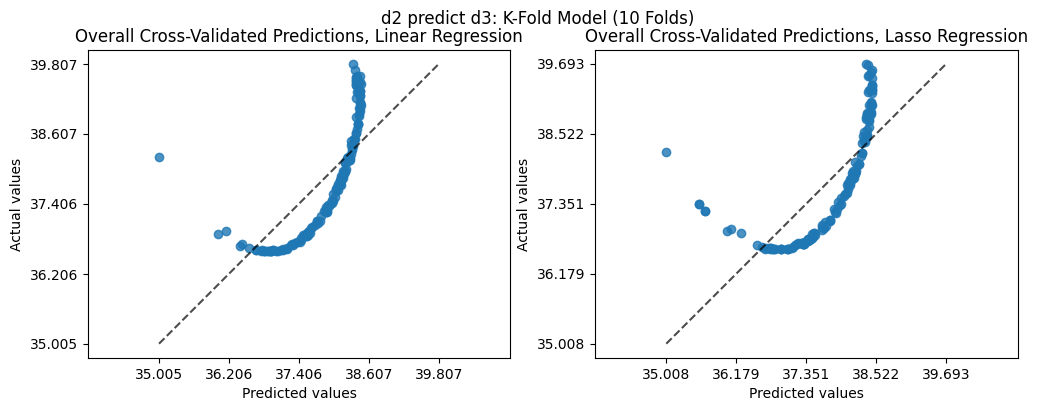

In [ ]:
# Perform cross-validation prediction on the ENTIRE dataset utilizing the Linear and Lasso Regression Models
# The 'kf' object is used internally by cross_val_predict to define the splits
predicted_all = cross_val_predict(model, x, d2, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, x, d2, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d2, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d2, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("x predict d2: K-Fold Method (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, x, d3, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, x, d3, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d3, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d3, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("x predict d3: K-Fold Method (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, x, d4, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, x, d4, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d4, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d4, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("x predict d4: K-Fold Method (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, x, y, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, x, y, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(y, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(y, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("x predict y: K-Fold Method (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, y, d4, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, y, d4, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d4, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d4, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("y predict d4: K-Fold Method (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, x, z, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, x, z, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(z, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(z, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("x predict z: K-Fold Method (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, z, d1, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, z, d1, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d1, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d1, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

plt.suptitle("z predict d1: K-Fold Model (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, d1, d2, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, d1, d2, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d2, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d2, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("d1 predict d2: K-Fold Model (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, d1, d3, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, d1, d3, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d3, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d3, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("d1 predict d3: K-Fold Model (10 Folds)")
plt.show()

# Perform cross-validation prediction on the ENTIRE dataset
# The 'kf' object is used internally by cross_val_predict to define the splits
predicted_all = cross_val_predict(model, d1, d4, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, d1, d4, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d4, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d4, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("d1 predict d4: K-Fold Model (10 Folds)")
plt.show()

predicted_all = cross_val_predict(model, d2, d3, cv=kf)
predicted_all_lasso = cross_val_predict(lasso, d2, d3, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('Overall Cross-Validated Predictions, Linear Regression')
ax[1].set_title('Overall Cross-Validated Predictions, Lasso Regression')

PredictionErrorDisplay.from_predictions(d3, predicted_all, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d3, predicted_all_lasso, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)
plt.suptitle("d2 predict d3: K-Fold Model (10 Folds)")
plt.show()

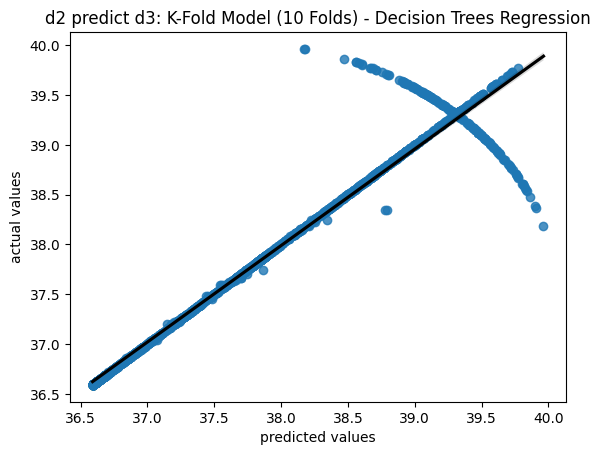

In [ ]:
#Here, we decided to also incorporate the DecisionTreeRegressor to get a new regression model to observe certain data that's too curved
dc = DecisionTreeRegressor()

# Perform cross-validation prediction on the ENTIRE dataset
# The 'kf' object is used internally by cross_val_predict to define the splits
predicted_all_tree = cross_val_predict(dc, d2, d3, cv=kf)


#Fit the data to the Decision Trees
dc.fit(d2, d3)

# Plot the overall results (Actual vs. Predicted)
plt.figure()

#plt.scatter(d3, predicted_all_tree)
#plot_tree(dc, filled=True, feature_names=d2, rounded=True)
sns.regplot(x=d3,y=predicted_all_tree, line_kws={'color': 'black'})
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.title("d2 predict d3: K-Fold Model (10 Folds) - Decision Trees Regression")
plt.show()

#This shows something a little more promising! A lot of the values lay on the regression line, try for more combinations

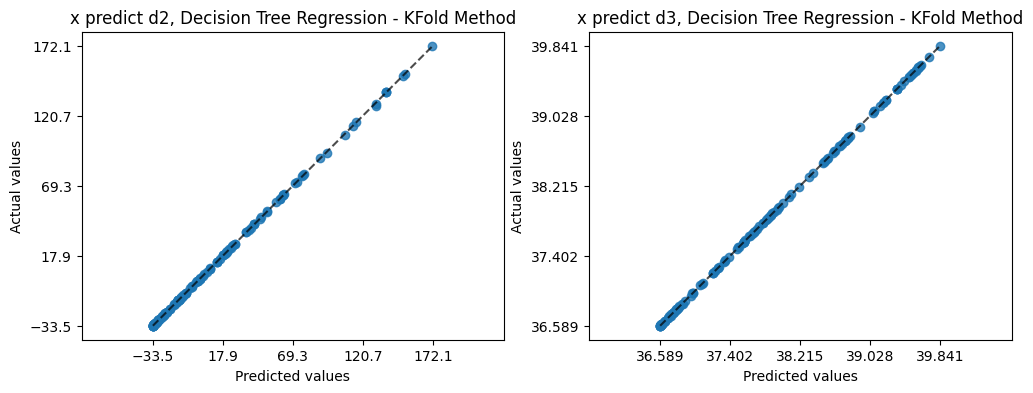

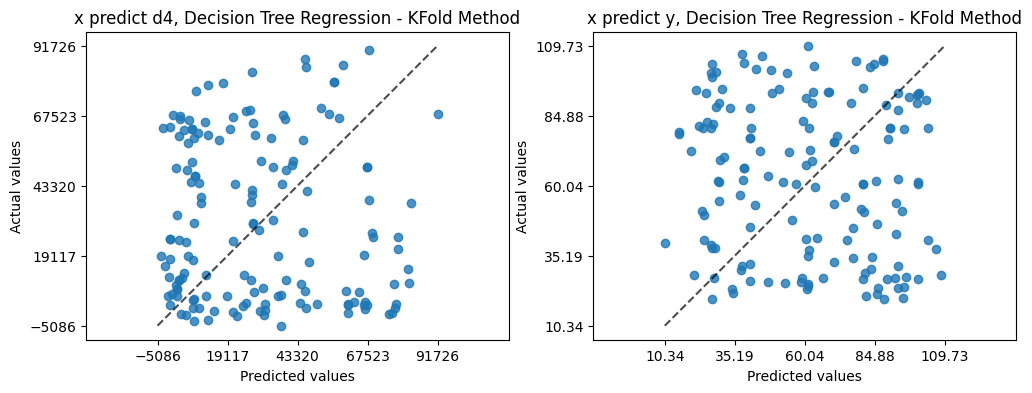

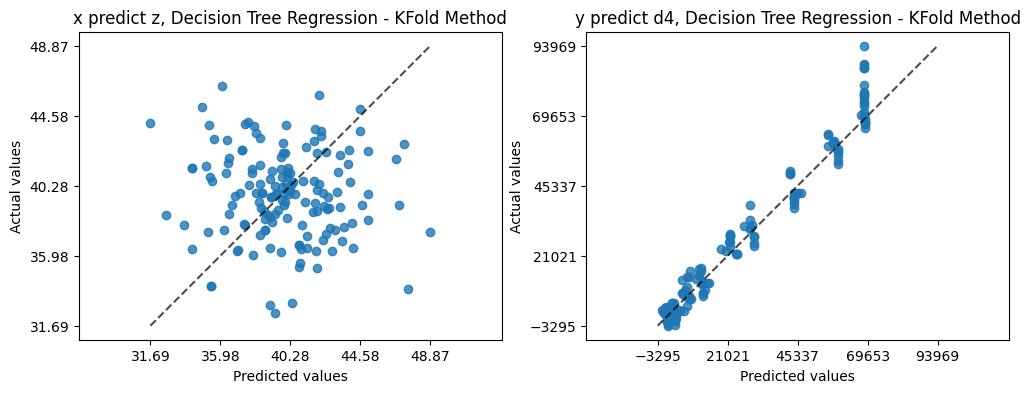

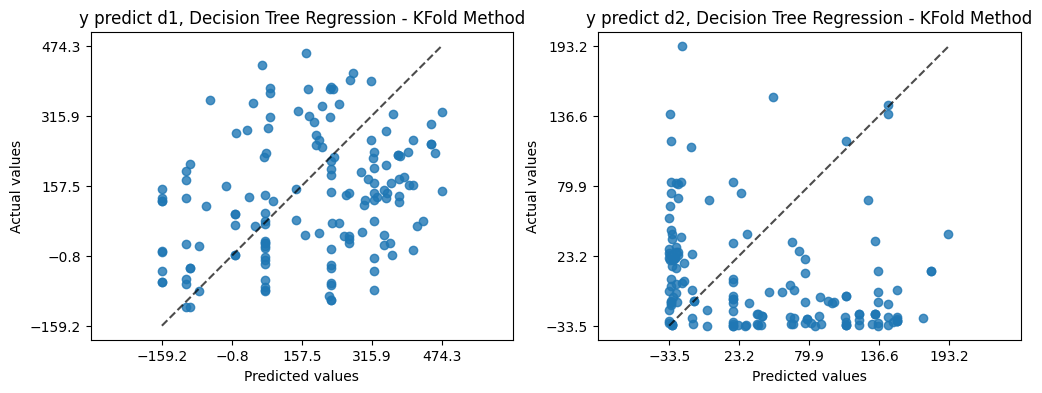

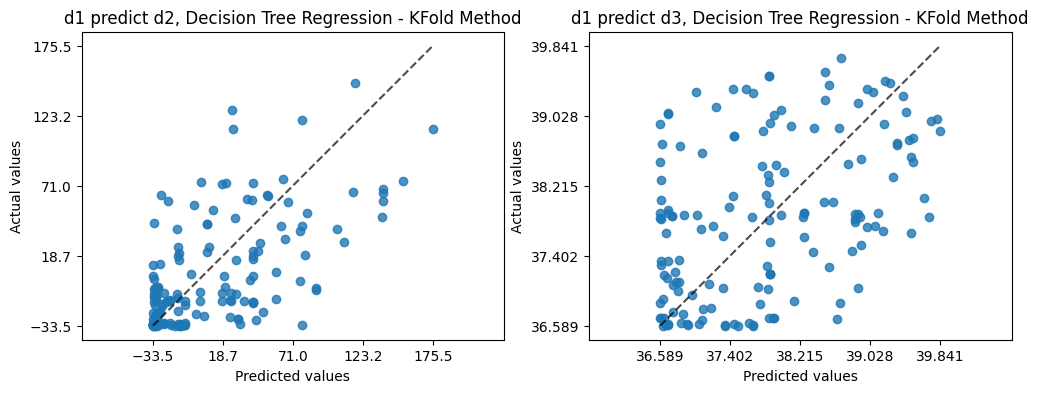

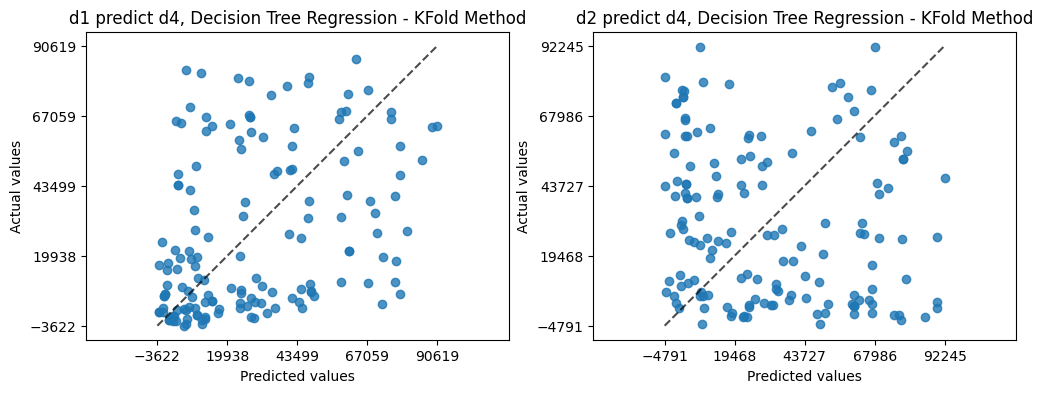

In [60]:
# Perform cross-validation prediction on the ENTIRE dataset
# The 'kf' object is used internally by cross_val_predict to define the splits
predicted_all_tree = cross_val_predict(dc, x, d2, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, x, d3, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('x predict d2, Decision Tree Regression - KFold Method')
ax[1].set_title('x predict d3, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(d2, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d3, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

plt.show()

predicted_all_tree = cross_val_predict(dc, x, d4, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, x, y, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('x predict d4, Decision Tree Regression - KFold Method')
ax[1].set_title('x predict y, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(d4, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(y, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)


predicted_all_tree = cross_val_predict(dc, x, z, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, y, d4, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('x predict z, Decision Tree Regression - KFold Method')
ax[1].set_title('y predict d4, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(z, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d4, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

predicted_all_tree = cross_val_predict(dc, y, d1, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, y, d2, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('y predict d1, Decision Tree Regression - KFold Method')
ax[1].set_title('y predict d2, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(d1, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d2, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

predicted_all_tree = cross_val_predict(dc, d1, d2, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, d1, d3, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('d1 predict d2, Decision Tree Regression - KFold Method')
ax[1].set_title('d1 predict d3, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(d2, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d3, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

predicted_all_tree = cross_val_predict(dc, d1, d4, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, d2, d4, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('d1 predict d4, Decision Tree Regression - KFold Method')
ax[1].set_title('d2 predict d4, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(d4, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(d4, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)


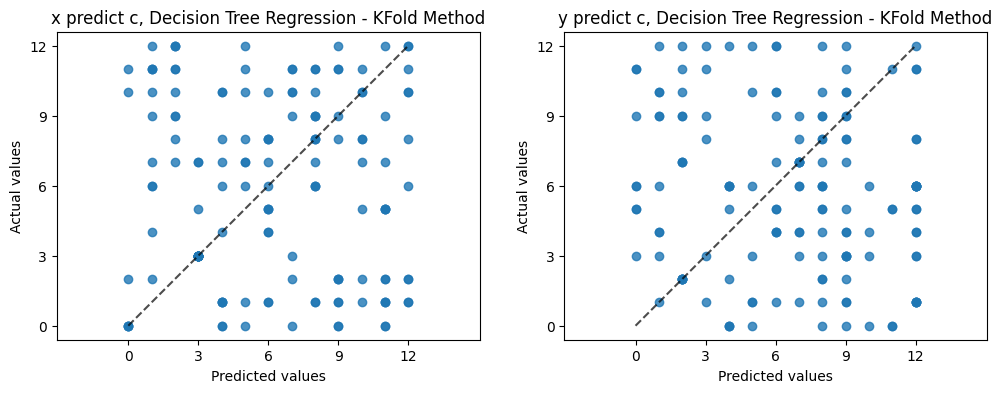

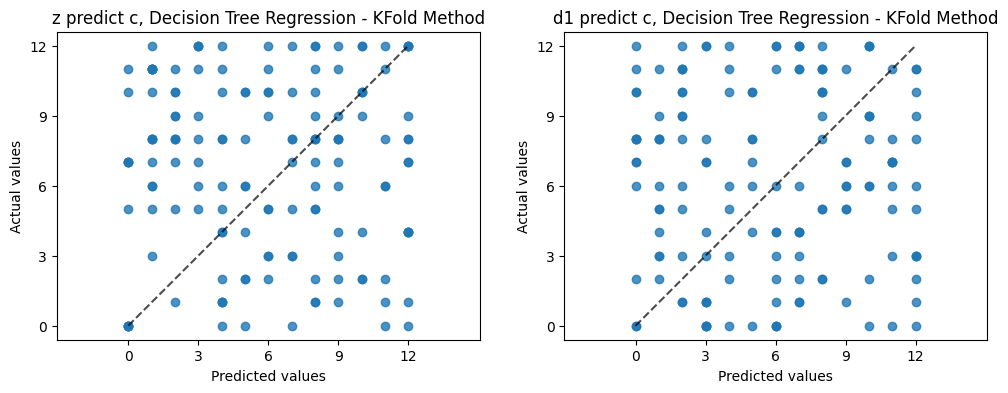

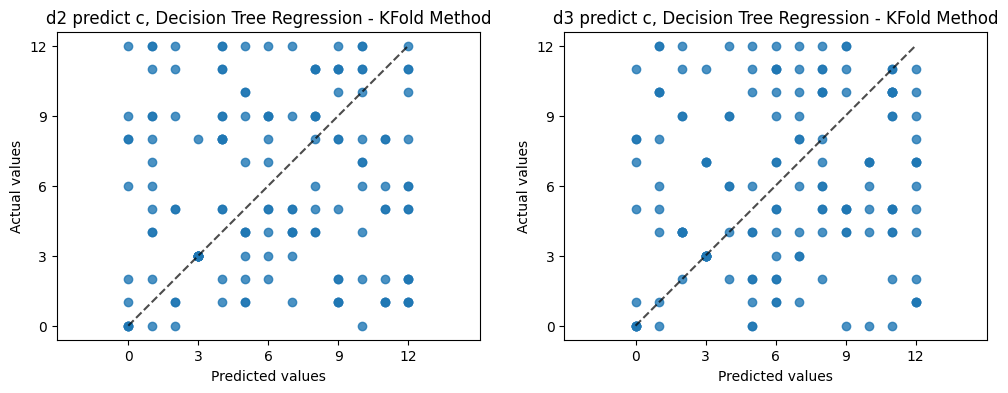

In [58]:
#Try to see if these models can predict c.
predicted_all_tree = cross_val_predict(dc, x, c, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, y, c, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('x predict c, Decision Tree Regression - KFold Method')
ax[1].set_title('y predict c, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(c, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(c, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

predicted_all_tree = cross_val_predict(dc, z, c, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, d1, c, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('z predict c, Decision Tree Regression - KFold Method')
ax[1].set_title('d1 predict c, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(c, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(c, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)

predicted_all_tree = cross_val_predict(dc, d2, c, cv=kf)
predicted_all_tree2 = cross_val_predict(dc, d3, c, cv=kf)

# Plot the overall results (Actual vs. Predicted)
fig, ax = plt.subplots(ncols =2, figsize=(12,4))
ax[0].set_title('d2 predict c, Decision Tree Regression - KFold Method')
ax[1].set_title('d3 predict c, Decision Tree Regression - KFold Method')

PredictionErrorDisplay.from_predictions(c, predicted_all_tree, kind='actual_vs_predicted',
                                        ax=ax[0], subsample=150)
PredictionErrorDisplay.from_predictions(c, predicted_all_tree2, kind='actual_vs_predicted',
                                        ax=ax[1], subsample=150)